In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df_agregado = pd.read_excel("/content/Dados Final (4).xlsx", sheet_name = 'Agregado')


In [ ]:
df_agregado = pd.read_excel("/content/Dados Final (4).xlsx", sheet_name = 'Agregado')
dados_covid_br = pd.read_csv("/content/casos_covid_brasil.csv")
_df = pd.read_excel('/content/Dados Finais - Refatorado.xlsx')
dados_covid_br['date'] = pd.to_datetime(dados_covid_br['date'])
_dummy_df = pd.Series({"JAN":52938,
 'FEV':49867,
 "MAR": 44220,
 "ABR":34030,
 "MAI":37331,
 "JUN":42613,
 "JUL":44508,
 "AGO":46679,
 "SET":47615,
 "OUT":48965,
 "NOV":47737,
 "DEZ":45340})
_dummy_df = _dummy_df.reset_index().rename({"index":"Meses",0:"Casos"},axis = 1)

In [ ]:
df_agregado['SET'] = df_agregado['SET'].fillna(0).astype(int)
palette = ['#0bd6d4',"#faca00","#ff5a60"]

#Dados Agregados.

In [ ]:
def extrai_regiao(estado):
  resultado = ''
  if estado == 'MG' or estado == 'SP' or estado == 'ES':
    resultado = 'Sudeste'
  elif estado == 'RS' or estado == 'SC':
    resultado = 'Sul'
  elif estado == 'PE' or estado == 'AL' or estado == 'CE':
    resultado = 'Nordeste'
  elif estado == 'GO' or estado == 'MS' or estado == 'DF':
    resultado = 'Centro-Oeste'
  else:
    resultado = 'Norte'
  return resultado 

df_agregado['Região'] =  df_agregado['UF'].apply(extrai_regiao)

##Análise de todos os Estados
Nesse tópico, iremos realizar uma análise que engloba todos os estados do nosso dataset, queremos verificar algumas hipóteses, entre elas são:
* Diferença entre os anos entre as categorias de natureza (Violência, Feminicidio, Estupro)
* Diferença entre as regiões, quais regiões tiveram mais casos e qual região teve mais casos?
* Existe algum mês que temos mais casos?
* Cenário da Pandemia, teve aumento de casos?
* Existiu após as medidas de implementação, redução dos índices de violência?
* Após o retorno das medidas de reabertura, aumento dos casos?



## Diferença entre os anos entre as categorias de natureza (Violência, Feminicidio, Estupro)

In [ ]:
df_agregado['ANO'] = df_agregado['ANO'].astype("object")

In [ ]:
meses = ['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT',
       'NOV', 'DEZ']
total = 0
for mes in meses:
  total += df_agregado[mes]
df_agregado['Total Casos'] = total

In [ ]:
df_agregado

,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ,ANO,UF,Natureza,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Região,Total Casos
0,12976,12596,11641,10665,10952,11802,12715,13122,13751,13474,13033,12630,2020,MG,Violência,NaN,NaN,NaN,NaN,NaN,Sudeste,149357
1,14028,12197,13581,12569,11745,11091,11369,11990,12541,13226,12946,13588,2019,MG,Violência,NaN,NaN,NaN,NaN,NaN,Sudeste,150871
2,24,38,28,27,24,32,24,26,33,28,30,25,2020,MG,FEMINICIDIO,NaN,NaN,NaN,NaN,NaN,Sudeste,339
3,30,28,26,28,38,26,24,24,38,41,25,52,2019,MG,FEMINICIDIO,NaN,NaN,NaN,NaN,NaN,Sudeste,380
4,5881,5034,5406,4804,4392,4388,4103,4464,4694,4808,4960,5436,2019,RS,Violência,NaN,NaN,NaN,NaN,NaN,Sul,58370
5,47,24,36,43,42,32,36,35,21,50,50,40,2019,RS,FEMINICIDIO,NaN,NaN,NaN,NaN,NaN,Sul,456
6,184,132,126,107,104,133,143,156,174,166,156,133,2019,RS,Estupro,NaN,NaN,NaN,NaN,NaN,Sul,1714
7,6014,5441,4686,3547,3627,3669,3575,4059,3843,4501,4610,4764,2020,RS,Violência,NaN,NaN,NaN,NaN,NaN,Sul,52336
8,193,178,157,110,136,148,141,152,160,202,182,149,2020,RS,Estupro,NaN,NaN,NaN,NaN,NaN,Sul,1908
9,33,29,33,33,40,34,24,31,32,44,37,31,2020,RS,FEMINICIDIO,NaN,NaN,NaN,NaN,NaN,Sul,401


In [ ]:
df_agregado.to_csv('final1.csv')

In [ ]:
natureza_por_ano = df_agregado.groupby(["Natureza",'ANO']).sum().reset_index()

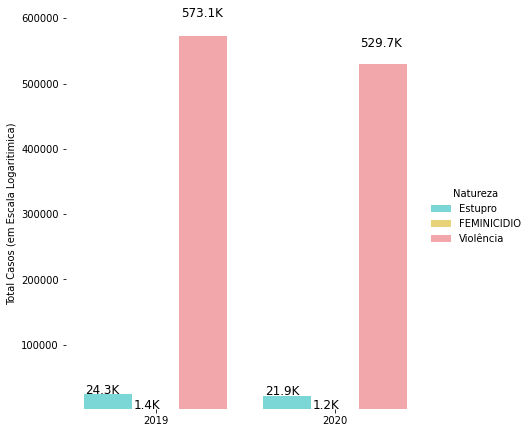

In [ ]:
g = sns.catplot(
    data=natureza_por_ano, kind="bar",
    x="ANO", y="Total Casos", hue="Natureza",
    palette=palette, alpha=.6, height=6
)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01, 
            p.get_height() * 1.05, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.ylim(2000,600000,100000)
g.despine(top=True, right=True, left=True, bottom=True,)
y_cumsum = np.cumsum(natureza_por_ano['Total Casos'])
y_max = y_cumsum.max()
ticks = [0, 0.25*y_max, 0.5*y_max, 0.75*y_max, y_max] 
#g.set(ylim = g.get_ylim()) # set second y axis to have the same limits as the first y axis
#g.set_yticklabels(["0%", "25%","50%","75%","100%"])
g.set_axis_labels("", "Total Casos (em Escala Logaritimica)")


Podemos perceber, no gráfico acima, que tivemos uma redução signficativa, ao realizar o comparativo entre o período de 2019 e 2020.
A maior redução que podemos observar é sobre a Violência, na qual em 2019, tivemos cerca de 573.1k enquanto em 2020 temos 529.7k, uma redução de quase 44k.

In [ ]:
dados_covid_br['mes'] = dados_covid_br['date'].apply(lambda x: x.month)

In [ ]:
dados_covid_br

,date,new_confirmed,mes
0,2020-02-25,2,2
1,2020-02-26,0,2
2,2020-02-27,0,2
3,2020-02-28,2,2
4,2020-02-29,0,2
...,...,...,...
306,2020-12-27,33653,12
307,2020-12-28,56316,12
308,2020-12-29,112633,12
309,2020-12-30,99028,12


In [ ]:
def fix_month(month):
  resultado = ''
  if month ==  2:
    resultado = 'FEV'
  elif month == 3:
    resultado = 'MAR'
  elif month == 4:
    resultado = 'ABR'
  elif month == 5:
    resultado = 'MAI'
  elif month == 6:
    resultado = 'JUN'
  elif month == 7:
    resultado = 'JUL'
  elif month == 8:
    resultado = 'AGO'
  elif month == 9:
    resultado = 'SET'
  elif month == 10:
    resultado = 'OUT'
  elif month == 11:
    resultado = 'NOV'
  else:
    resultado = 'DEZ'
  return resultado

dados_covid_br['MES_NOMINAL'] = dados_covid_br['mes'].apply(fix_month)

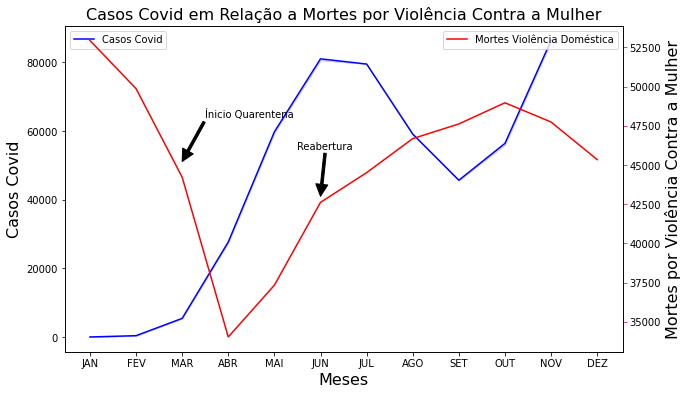

AttributeError: ignored

In [ ]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
dados_covid_br['mes']
#bar plot creation
ax1.set_title('Casos Covid em Relação a Mortes por Violência Contra a Mulher', fontsize=16)
ax1.set_xlabel('Meses', fontsize=16)
ax1.set_ylabel('Casos Covid', fontsize=16)
ax1 = sns.lineplot(x = 'MES_NOMINAL', y = 'new_confirmed', data = dados_covid_br,ci = False,color='blue', label = 'Casos Covid')
ax1.tick_params(axis='y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_ylabel('Mortes por Violência Contra a Mulher', fontsize=16)
ax2 = sns.lineplot(
    data=_dummy_df,
    x="Meses", y="Casos",
    color="red", label = 'Mortes Violência Doméstica'
)
ax2.tick_params(axis='y', color=color)
plt.annotate('Ínicio Quarentena', xy=(2,45220), xytext=(2.5, 48000),
             arrowprops=dict(facecolor='black', shrink=1,  width=2.5))
plt.annotate('Reabertura', xy=(5,43000), xytext=(4.5, 46000),
             arrowprops=dict(facecolor='black', shrink=1,  width=2.5))
#show plot
plt.show()
plt.savefig("violência_casos_covid.png")

In [ ]:
dados_covid_br

,date,new_confirmed,mes,MES_NOMINAL
0,2020-02-25,2,2,FEV
1,2020-02-26,0,2,FEV
2,2020-02-27,0,2,FEV
3,2020-02-28,2,2,FEV
4,2020-02-29,0,2,FEV
...,...,...,...,...
306,2020-12-27,33653,12,DEZ
307,2020-12-28,56316,12,DEZ
308,2020-12-29,112633,12,DEZ
309,2020-12-30,99028,12,DEZ


Podemos associar, os índices de violência domestica, desde de janeiro, com os casos de COVID-19, podemos perceber que a medida que ocorre os processos de reabertura do comércio, temos uma explosão de casos decorrentes da doença e ao mesmo tempo temos um aumento relativo de casos.

Logo, podemos associar que ao decorrer das medidas de quarentena temos uma queda de casos de casos de violência o que acarretou em uma diminuição em totais de crimes em relação a 2020.

Algumas notícias referem a essa queda, como por exemplo:

[Violência doméstica: DF registra queda de casos durante pandemia](https://www.correiobraziliense.com.br/cidades-df/2020/10/4880073-violencia-domestica-df-registra-queda-de-casos-durante-pandemia.html)

[Na pandemia, violência despenca em MG, mas um tipo de crime aumenta](https://www.em.com.br/app/noticia/gerais/2020/10/03/interna_gerais,1191293/na-pandemia-violencia-despenca-em-mg-mas-um-tipo-de-crime-aumenta.shtml)



##Correlação entre as variáveis

##Diferença entre as regiões, quais regiões tiveram mais casos e qual região teve mais casos?
Vamos tentar identificar com em quais regiões do país, tiveram mais casos de violência entre si, também realizando o comparativo entre os anos afim de identificar variações.

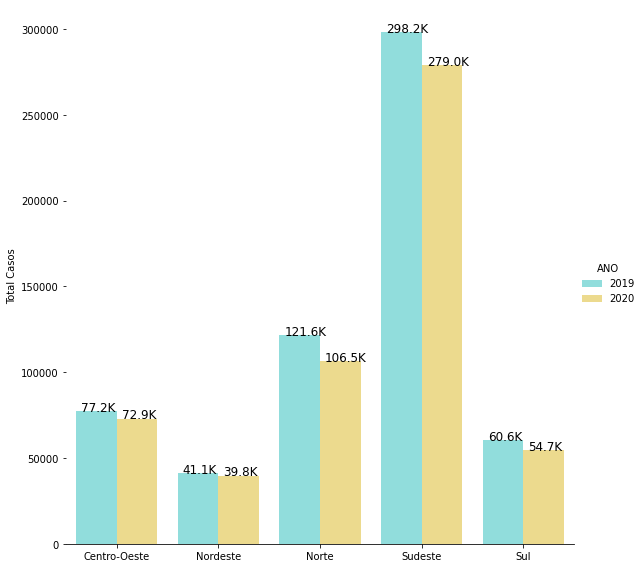

In [ ]:
regioes_agrupadas1 = df_agregado.groupby(['Região','ANO']).sum().reset_index()

g = sns.catplot(
    data=regioes_agrupadas1, kind="bar",
    x="Região", y="Total Casos", hue="ANO",
    palette=palette, alpha=.5, height=8,ci = False
)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.05, 
            p.get_height() * 1, 
           '{0:.1f}K'.format(p.get_height()/1000),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
g.despine(left=True)
g.set_axis_labels("", "Total Casos")

In [ ]:
regioes_agrupadas = df_agregado.groupby(['Região','Natureza','ANO']).sum().reset_index()
regioes_agrupadas

,Região,Natureza,ANO,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Total Casos
0,Centro-Oeste,Estupro,2019,267,242,262,281,240,246,265,332,307,278,282,260,0.0,0.0,0.0,0.0,0.0,3262
1,Centro-Oeste,Estupro,2020,274,236,235,188,181,205,233,235,227,241,217,205,0.0,0.0,0.0,0.0,0.0,2677
2,Centro-Oeste,FEMINICIDIO,2019,6,4,11,8,9,10,5,9,9,9,8,14,0.0,0.0,0.0,0.0,0.0,102
3,Centro-Oeste,FEMINICIDIO,2020,8,7,7,9,8,8,7,9,8,6,8,15,0.0,0.0,0.0,0.0,0.0,100
4,Centro-Oeste,Violência,2019,4781,5973,6718,6289,6310,5638,5588,6063,6767,6656,6629,6437,0.0,0.0,0.0,0.0,0.0,73849
5,Centro-Oeste,Violência,2020,6374,5945,5454,5165,5311,5331,5254,5937,6149,6623,6463,6146,0.0,0.0,0.0,0.0,0.0,70152
6,Nordeste,Estupro,2019,212,188,221,181,231,194,209,216,217,210,204,197,0.0,0.0,0.0,0.0,0.0,2480
7,Nordeste,Estupro,2020,214,212,160,156,182,179,170,214,215,184,178,174,0.0,0.0,0.0,0.0,0.0,2238
8,Nordeste,FEMINICIDIO,2019,9,3,2,7,9,7,7,6,6,7,5,8,0.0,7.0,27.0,27.0,41.0,76
9,Nordeste,FEMINICIDIO,2020,6,5,1,3,3,6,4,7,7,6,3,5,0.0,38.0,50.0,47.0,42.0,56


In [ ]:
regioes_agrupadas = df_agregado.groupby(['Região','Natureza','ANO']).sum().reset_index()


In [ ]:
nordeste = regioes_agrupadas[regioes_agrupadas['Região'] == 'Nordeste']

In [ ]:
regioes_agrupadas.to_csv('regiao_agrupada.csv')

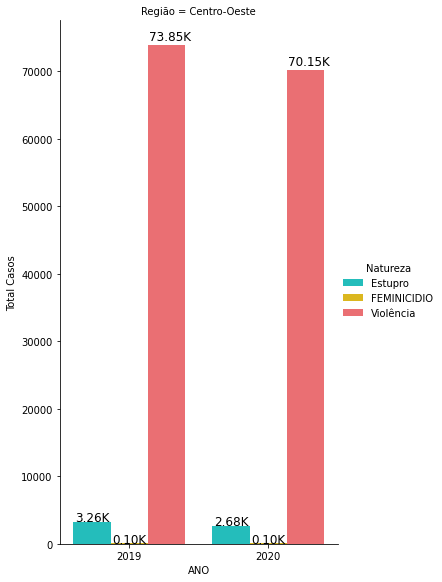

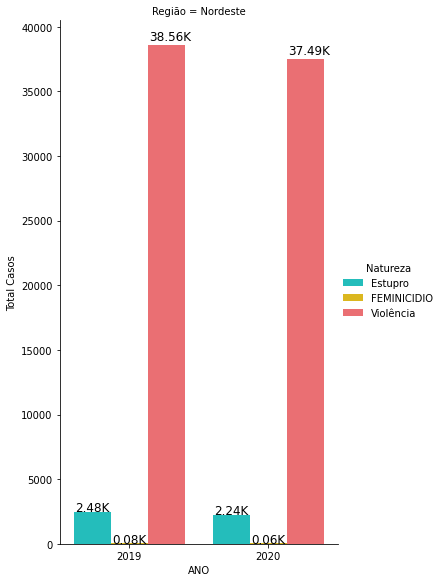

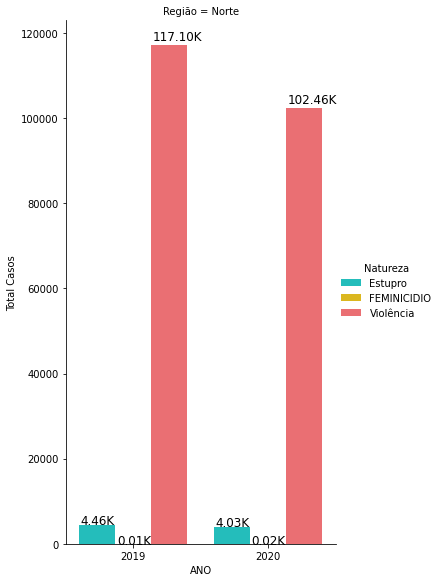

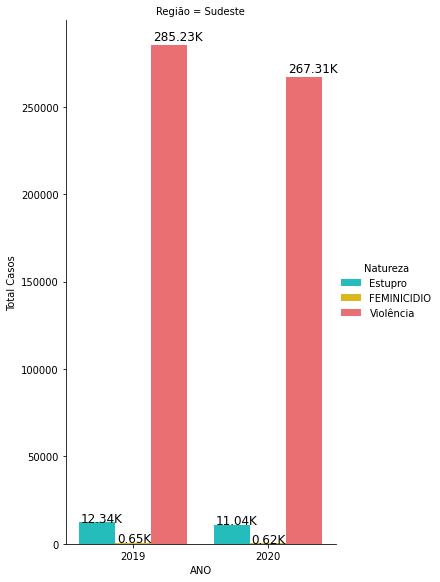

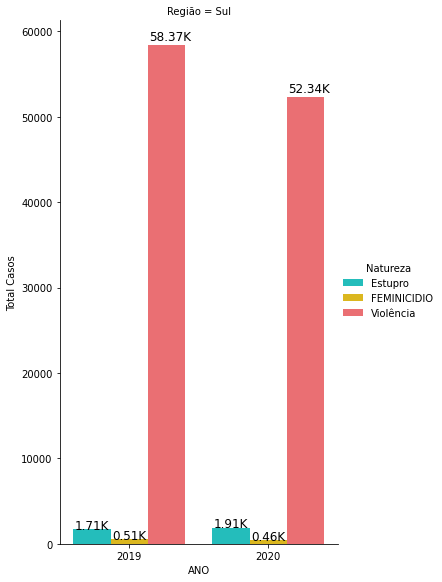

In [ ]:
for regiao in regioes_agrupadas['Região'].unique():
  regiao_atual = regioes_agrupadas[regioes_agrupadas['Região'] == regiao]
  g = sns.catplot(
    data=regiao_atual, kind="bar",
    x="ANO", y="Total Casos", hue="Natureza",
    palette=palette, aspect = 0.6,height=8,ci = False, col ='Região'
  )
  ax = g.facet_axis(0,0)
  for p in ax.patches:
    ax.text(p.get_x() + 0.01, 
            p.get_height() *  1.01, 
            '{0:.2f}K'.format(p.get_height()/1000),   #Used to format it K representation
              color='black', 
              rotation='horizontal'
              , 
              size='large')

In [ ]:
sul = regioes_agrupadas[regioes_agrupadas['Região'] == 'Sul']

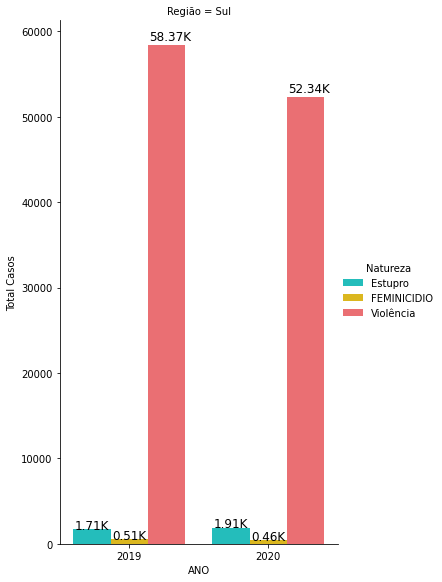

In [ ]:
g = sns.catplot(
    data=sul, kind="bar",
    x="ANO", y="Total Casos", hue="Natureza",
    palette=palette, aspect = 0.6,height=8,ci = False, col ='Região'
)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01, 
            p.get_height() *  1.01, 
            '{0:.2f}K'.format(p.get_height()/1000),   #Used to format it K representation
              color='black', 
              rotation='horizontal'
              , 
              size='large')
g.savefig("output-sul.png")

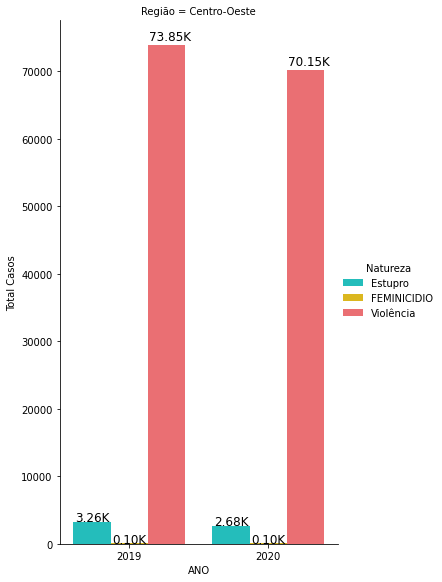

In [ ]:
g = sns.catplot(
    data=centro_oeste, kind="bar",
    x="ANO", y="Total Casos", hue="Natureza",
    palette=palette, aspect = 0.6,height=8,ci = False, col ='Região'
)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01, 
            p.get_height() *  1.01, 
            '{0:.2f}K'.format(p.get_height()/1000),   #Used to format it K representation
              color='black', 
              rotation='horizontal'
              , 
              size='large')
g.savefig("output.png")

<Figure size 864x576 with 0 Axes>

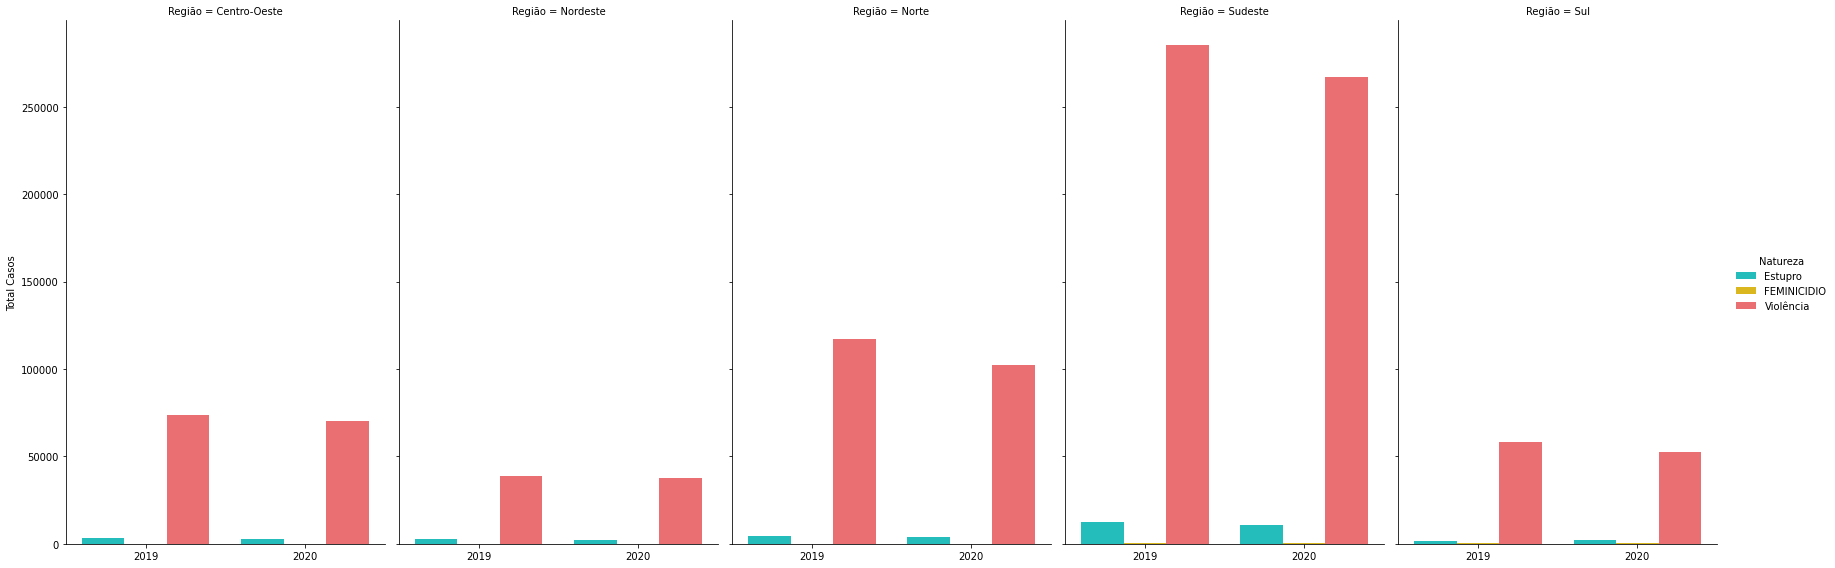

In [ ]:
regioes_agrupadas = df_agregado.groupby(['Região','Natureza','ANO']).sum().reset_index()
plt.figure(figsize=(12,8))
g = sns.catplot(
    data=regioes_agrupadas, kind="bar",
    x="ANO", y="Total Casos", hue="Natureza",
    palette=palette, aspect = 0.6,height=8,ci = False, col ='Região'
)

#g.set(yscale = 'log', )
g.set_axis_labels("", "Total Casos")

In [ ]:
regioes_agrupadas

,Região,Natureza,ANO,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Total Casos
0,Centro-Oeste,Estupro,2019,267,242,262,281,240,246,265,332,307,278,282,260,0.0,0.0,0.0,0.0,0.0,3262
1,Centro-Oeste,Estupro,2020,274,236,235,188,181,205,233,235,227,241,217,205,0.0,0.0,0.0,0.0,0.0,2677
2,Centro-Oeste,FEMINICIDIO,2019,6,4,11,8,9,10,5,9,9,9,8,14,0.0,0.0,0.0,0.0,0.0,102
3,Centro-Oeste,FEMINICIDIO,2020,8,7,7,9,8,8,7,9,8,6,8,15,0.0,0.0,0.0,0.0,0.0,100
4,Centro-Oeste,Violência,2019,4781,5973,6718,6289,6310,5638,5588,6063,6767,6656,6629,6437,0.0,0.0,0.0,0.0,0.0,73849
5,Centro-Oeste,Violência,2020,6374,5945,5454,5165,5311,5331,5254,5937,6149,6623,6463,6146,0.0,0.0,0.0,0.0,0.0,70152
6,Nordeste,Estupro,2019,212,188,221,181,231,194,209,216,217,210,204,197,0.0,0.0,0.0,0.0,0.0,2480
7,Nordeste,Estupro,2020,214,212,160,156,182,179,170,214,215,184,178,174,0.0,0.0,0.0,0.0,0.0,2238
8,Nordeste,FEMINICIDIO,2019,9,3,2,7,9,7,7,6,6,7,5,8,0.0,7.0,27.0,27.0,41.0,76
9,Nordeste,FEMINICIDIO,2020,6,5,1,3,3,6,4,7,7,6,3,5,0.0,38.0,50.0,47.0,42.0,56


In [ ]:
regioes_agrupadas.to_csv('eae.csv')

In [ ]:
regioes = regioes_agrupadas['Região'].unique()
centro_oeste =regioes_agrupadas[regioes_agrupadas['Região'] == 'Centro-Oeste']

c = alt.Chart(centro_oeste).mark_bar().encode(
      x = alt.X('ANO:O'), y = alt.Y('Total Casos:Q'), color = 'Natureza'
)
c

alt.Chart(...)

In [ ]:
import altair as alt

alt.Chart(regioes_agrupadas).mark_bar().encode(
    y = alt.Y('Total Casos:Q'),
    x = alt.X('ANO:O'),
    row = 'Natureza:N', column = 'Região:O'
).properties(height = 400,width = 200)


alt.Chart(...)

Podemos perceber entre as regiões, que tivemos uma grande redução de casos.

No ano de 2019, a região que apresentou maiores índices de Violência e Estupro foram a Região Sudeste e Norte, apenas a região apresentava os menores índices de Feminicídio.

No Ano de 2020, a ordem de regiões mais violentas é mantida, com a região Sudeste e Norte liderando os casos, contundo tivemos um aumento do número de feminicídios.

In [ ]:
import plotly.express as px
fig = px.bar(centro_oeste, x="ANO", y="Total Casos", text = 'Total Casos', color="Natureza", barmode="group",
          log_y =True, height=800, title = '')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

##Existe algum mês que temos mais casos?
Vamos identificar nessa análise, qual meses que temos mais casos, vale lembrar que tal cálculo, buscamos medir em qual meses, fazendo um somatorio, verificando em cada vez as ocorrências, na qual, o mesmo, apareceu com maior índice de criminalidade.

In [ ]:
df_agregado['UF'].unique()

array(['MG', 'RS', 'ES', 'PE', 'AM', 'SP', 'AC', 'AL', 'CE', 'SC', 'GO',
       'DF', 'MS'], dtype=object)

In [ ]:
df_agregado.columns

Index(['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT',
       'NOV', 'DEZ', 'ANO', 'UF', 'Natureza', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Região', 'Total Casos'],
      dtype='object')

In [ ]:
maxvalues = df_agregado[['JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT',
       'NOV', 'DEZ']].idxmax(axis=1).values
df_agregado['Mes de Maior Caso'] = maxvalues

In [ ]:
df_agregado_2019 = df_agregado[df_agregado['ANO'] == 2019]
df_agregado_2020 = df_agregado[df_agregado['ANO'] == 2020]

In [ ]:
df_agregado_2019

,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ,ANO,UF,Natureza,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Região,Total Casos,Mes de Maior Caso
1,14028,12197,13581,12569,11745,11091,11369,11990,12541,13226,12946,13588,2019,MG,Violência,NaN,NaN,NaN,NaN,NaN,Sudeste,150871,JAN
3,30,28,26,28,38,26,24,24,38,41,25,52,2019,MG,FEMINICIDIO,NaN,NaN,NaN,NaN,NaN,Sudeste,380,DEZ
4,5881,5034,5406,4804,4392,4388,4103,4464,4694,4808,4960,5436,2019,RS,Violência,NaN,NaN,NaN,NaN,NaN,Sul,58370,JAN
5,47,24,36,43,42,32,36,35,21,50,50,40,2019,RS,FEMINICIDIO,NaN,NaN,NaN,NaN,NaN,Sul,456,OUT
6,184,132,126,107,104,133,143,156,174,166,156,133,2019,RS,Estupro,NaN,NaN,NaN,NaN,NaN,Sul,1714,JAN
11,9,7,6,9,8,3,7,5,7,8,12,8,2019,ES,FEMINICIDIO,NaN,NaN,NaN,NaN,NaN,Sudeste,89,NOV
13,3100,2970,3259,2980,3048,2803,2802,2760,3074,3267,3196,3317,2019,PE,Violência,NaN,NaN,NaN,NaN,NaN,Nordeste,36576,DEZ
14,212,188,221,181,231,194,209,216,217,210,204,197,2019,PE,Estupro,NaN,NaN,NaN,NaN,NaN,Nordeste,2480,MAI
16,9312,9707,10523,9575,10125,9526,9999,10569,9656,9704,9602,8805,2019,AM,Violência,NaN,NaN,NaN,NaN,NaN,Norte,117103,AGO
18,63,66,79,68,73,70,62,96,98,82,59,59,2019,AM,Estupro,NaN,NaN,NaN,NaN,NaN,Norte,875,SET


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



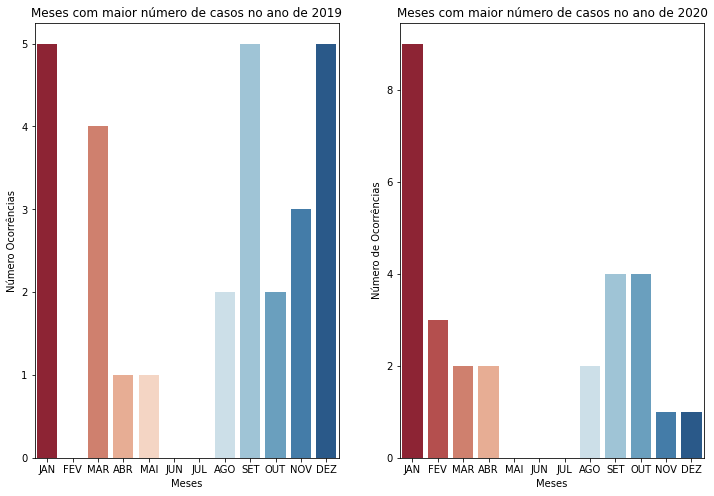

In [ ]:
fig, ax =plt.subplots(1,2,figsize = (12,8))
g1 = sns.countplot(x= 'Mes de Maior Caso', data = df_agregado_2019,
                   ax=ax[0],order = ['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ'],palette='RdBu')
g2 = sns.countplot(df_agregado_2020['Mes de Maior Caso'],  order = ['JAN','FEV','MAR','ABR','MAI','JUN','JUL','AGO','SET','OUT','NOV','DEZ'],ax=ax[1],palette='RdBu')
g1.set(xlabel = 'Meses', ylabel= 'Número Ocorrências',title= 'Meses com maior número de casos no ano de 2019')
g2.set(xlabel = 'Meses', ylabel = 'Número de Ocorrências', title = 'Meses com maior número de casos no ano de 2020')
fig.show()

Podemos perceber que em 2019, tivemos 3 meses com maior número de casos, Setembro, Dezembro e Janeiro.

Já em 2020, temos Janeiro liderando o número de casos, o que aponta uma tendência de aumento de casos decorrentes de 2019.

Podemos perceber também que, após as medidas de lockdown, iniciadas em março, tivemos uma reduçõ em relação ao ano anterior.

Também podemos sinalizar, uma redução significativa de meses com maior índice de crimes contra mulheres, como no caso de Dezembro, na qual, tivemos para um caso e Novembro também.
Podemos correlacionar esse fator ao aumento de número de casos, no Brasil. Como podemos ver no grafico abaixo.



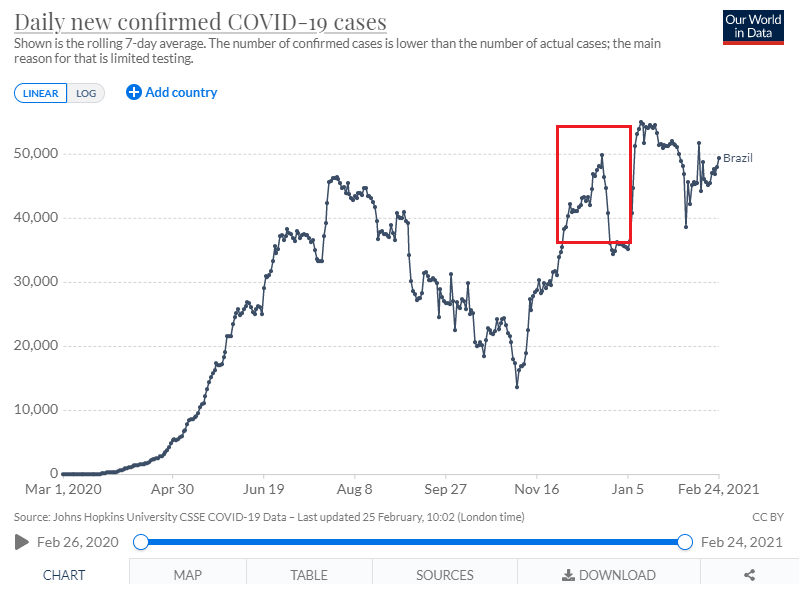
Podemos ver, na área marcada por vermelho, dados referentes a Dezembro, um aumento de casos, o que pode refletir na redução de indicadores de crimes contra a mulher.


##Existiu após as medidas de implementação contra o Corona Virus, redução dos índices de violência?



In [ ]:
casos_2020 = _df[_df['Ano'] == 2020]
casos_2020['Região'] =  casos_2020['UF'].apply(extrai_regiao)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



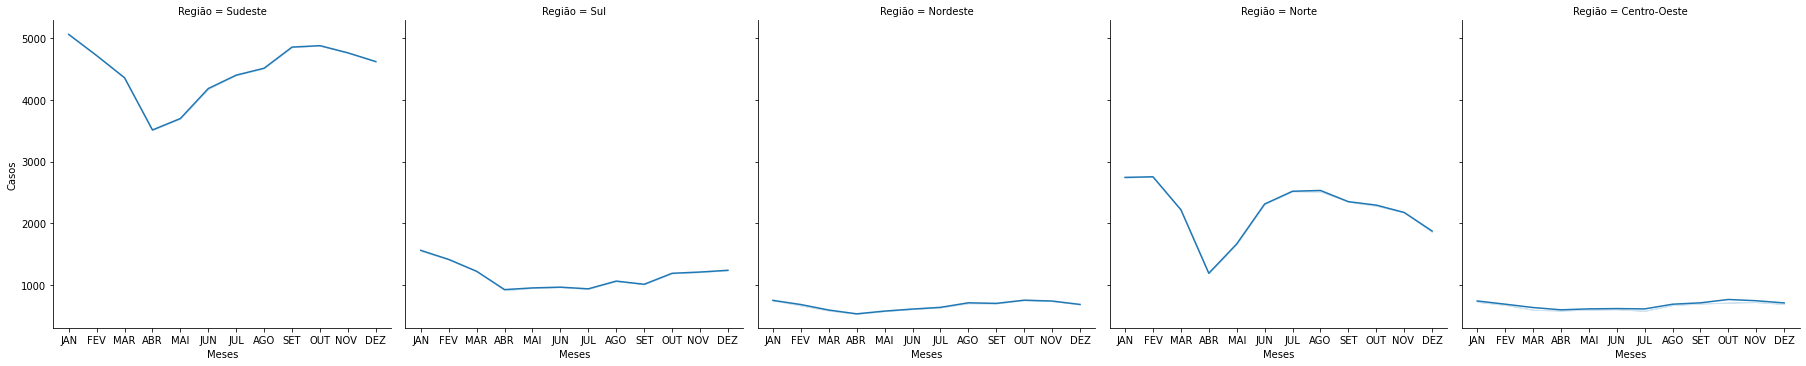

In [ ]:
g = sns.relplot(x = 'Meses', y =  'Casos', data = casos_2020,col='Região',
            kind = 'line', ci = False)

plt.show()

Em todos os gráficos é possível, perceber que após as metidas adotadas em Março, para contenção da COVID-19, percebemos que nos 2 meses subsequentes, temos um crescimento bastante lento mas que voltou a se acentuar em junho.

Vamos visualizar isso melhor em um gráfico, que agrupa todos os casos e sinalizar através de setas medidas importantes.

In [ ]:
_casos_2020 = casos_2020.groupby("Meses").sum()

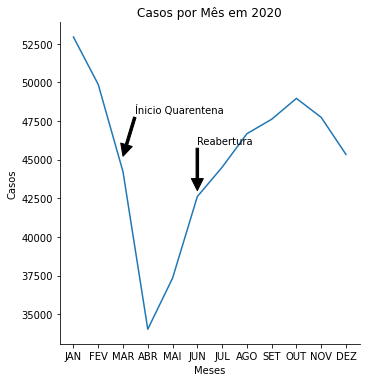

In [ ]:
sns.relplot(x = 'Meses', y =  'Casos', data = _dummy_df,
            kind = 'line', ci = False,  markers=True, dashes=True)
plt.annotate('Ínicio Quarentena', xy=(2,45220), xytext=(2.5, 48000),
             arrowprops=dict(facecolor='black', shrink=1,  width=2.5))
plt.annotate('Reabertura', xy=(5,43000), xytext=(5, 46000),
             arrowprops=dict(facecolor='black', shrink=1,  width=2.5))
plt.title("Casos por Mês em 2020")
plt.show()

Podemos perceber, através das sinalizações, que a partir da implementação da quarentena, houve uma redução siginifcativa de casos, contudo a partir dos processos de reabertura voltou o crescimento de casos de violência.

#Dados Nominais

In [ ]:
import pandas as pd
dados_nominais = pd.read_excel("/content/Dados Final (4).xlsx",sheet_name=  'Dados Nominal')
dados_nominais

,Natureza,Data,Mês,Ano,Município,Sexo,Idade,Arma-Utilizada,Estado
0,TENTADO,2019-01-03,1.0,2019.0,UBERLANDIA,Não Informado,Não Informado,Não Informado,MG
1,CONSUMADO,2019-01-04,1.0,2019.0,NOVA LIMA,Não Informado,Não Informado,Não Informado,NaN
2,TENTADO,2019-01-05,1.0,2019.0,BELO HORIZONTE,Não Informado,Não Informado,Não Informado,NaN
3,TENTADO,2019-01-05,1.0,2019.0,ITAUNA,Não Informado,Não Informado,Não Informado,NaN
4,CONSUMADO,2019-01-05,1.0,2019.0,MONTE CARMELO,Não Informado,Não Informado,Não Informado,NaN
...,...,...,...,...,...,...,...,...,...
83203,HOMICÍDIO DOLOSO,2019-12-05,NaN,NaN,CARIACICA,F,34.0,NaN,NaN
83204,HOMICÍDIO DOLOSO,2019-12-22,NaN,NaN,SAO MATEUS,F,27.0,NaN,NaN
83205,HOMICÍDIO DOLOSO,2019-12-25,NaN,NaN,LINHARES,F,55.0,NaN,NaN
83206,HOMICÍDIO DOLOSO,2019-12-28,NaN,NaN,SAO ROQUE DO CANA,F,39.0,NaN,NaN


In [ ]:
import numpy as np 
np.isnat

<ufunc 'isnat'>

In [ ]:
dados_nominais['Arma-Utilizada'].value_counts()

PAF              1666
Não Informado     697
BRANCA            375
21                251
20                236
                 ... 
4                   1
3                   1
2                   1
1                   1
0                   1
Name: Arma-Utilizada, Length: 98, dtype: int64

In [ ]:
import numpy as np 
dados_nominais[(dados_nominais['Idade'] != 'Não Informado') | (np.isnan(['Idade'] != True))]

,Natureza,Data,Mês,Ano,Município,Sexo,Idade,Arma-Utilizada,Estado
697,HOMICIDIO DOLOSO,2020-01-01,NaN,NaN,Maranguape,Masculino,26,26,CE
698,HOMICIDIO DOLOSO,2020-01-01,NaN,NaN,Caucaia,Masculino,40,40,NaN
699,HOMICIDIO DOLOSO,2020-01-01,NaN,NaN,Mauriti,Masculino,23,23,NaN
700,HOMICIDIO DOLOSO,2020-01-01,NaN,NaN,Caucaia,Masculino,53,53,NaN
701,HOMICIDIO DOLOSO,2020-01-01,NaN,NaN,Fortaleza,Masculino,19,19,NaN
...,...,...,...,...,...,...,...,...,...
83203,HOMICÍDIO DOLOSO,2019-12-05,NaN,NaN,CARIACICA,F,34.0,NaN,NaN
83204,HOMICÍDIO DOLOSO,2019-12-22,NaN,NaN,SAO MATEUS,F,27.0,NaN,NaN
83205,HOMICÍDIO DOLOSO,2019-12-25,NaN,NaN,LINHARES,F,55.0,NaN,NaN
83206,HOMICÍDIO DOLOSO,2019-12-28,NaN,NaN,SAO ROQUE DO CANA,F,39.0,NaN,NaN


In [ ]:
_df_nominal = dados_nominais

In [ ]:
_df_nominal['Idade'].replace("Não Informado", -1).replace('-',-1).value_counts()

-1      888
21      337
22      311
23      302
18      299
       ... 
77.0      1
71.0      1
7.0       1
80.0      1
85        1
Name: Idade, Length: 170, dtype: int64

In [ ]:
dados_nominais['Estado'].unique()

array(['MG', nan, 'CE', 'PE', 'AL', 'ES'], dtype=object)

##Tratamento de Dados



In [ ]:
dados_nominais['Estado'] = dados_nominais['Estado'].fillna(method = 'ffill')

In [ ]:
dados_nominais['Estado'].value_counts()

PE    73239
CE     5649
AL     2385
ES     1238
MG      697
Name: Estado, dtype: int64

In [ ]:
dados_nominais['Idade'] = dados_nominais['Idade'].fillna('Não Informado')
dados_nominais['Arma-Utilizada'] = dados_nominais['Arma-Utilizada'].fillna("Não Informado")

In [ ]:
dados_nominais['Mês'] = dados_nominais['Data'].apply(lambda x: x.month)
dados_nominais['Ano'] = dados_nominais['Data'].apply(lambda x: x.year)

In [ ]:
dados_nominais['Sexo'] = dados_nominais['Sexo'].apply(lambda x: 'Feminino' if x == 'F' else x)

In [ ]:
dados_nominais['Sexo'].value_counts()

FEMININO         68497
Masculino         7349
MASCULINO         4627
M                 1038
Feminino           883
Não Informado      697
DESCONHECIDO        89
NAO INFORMADO       26
MA DE                2
Name: Sexo, dtype: int64

In [ ]:
dados_nominais['Sexo'] = dados_nominais['Sexo'].str.lower()

In [ ]:
dados_nominais = dados_nominais[(dados_nominais['Sexo'] == 'feminino') | (dados_nominais['Sexo'] == 'não informado')]
dados_nominais

,Natureza,Data,Mês,Ano,Município,Sexo,Idade,Arma-Utilizada,Estado
0,TENTADO,2019-01-03,1.0,2019.0,UBERLANDIA,não informado,Não Informado,Não Informado,MG
1,CONSUMADO,2019-01-04,1.0,2019.0,NOVA LIMA,não informado,Não Informado,Não Informado,MG
2,TENTADO,2019-01-05,1.0,2019.0,BELO HORIZONTE,não informado,Não Informado,Não Informado,MG
3,TENTADO,2019-01-05,1.0,2019.0,ITAUNA,não informado,Não Informado,Não Informado,MG
4,CONSUMADO,2019-01-05,1.0,2019.0,MONTE CARMELO,não informado,Não Informado,Não Informado,MG
...,...,...,...,...,...,...,...,...,...
83203,HOMICÍDIO DOLOSO,2019-12-05,12.0,2019.0,CARIACICA,feminino,34.0,Não Informado,ES
83204,HOMICÍDIO DOLOSO,2019-12-22,12.0,2019.0,SAO MATEUS,feminino,27.0,Não Informado,ES
83205,HOMICÍDIO DOLOSO,2019-12-25,12.0,2019.0,LINHARES,feminino,55.0,Não Informado,ES
83206,HOMICÍDIO DOLOSO,2019-12-28,12.0,2019.0,SAO ROQUE DO CANA,feminino,39.0,Não Informado,ES


In [ ]:
def arruma_armas(arma_utilizada):
  resultado = ''
  if arma_utilizada == 'ESPANCAMEN':
    resultado = 'ESPANCAMENTO'
  elif arma_utilizada == 'ASFIXIA MECANICA' or arma_utilizada == 'ASFIXIA':
    resultado = 'ASFIXIA MECÂNICA'
  elif arma_utilizada == '-':
    resultado = 'Não Informado'
  elif arma_utilizada == 'PAF/B':
    resultado = 'PAF'
  elif arma_utilizada == 'NI':
    resultado = 'Não Informado'
  else:
    resultado = arma_utilizada
  return resultado
  

dados_nominais['Arma-Utilizada'] = dados_nominais['Arma-Utilizada'].apply(arruma_armas)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dados_nominais['Arma-Utilizada'].value_counts()

Não Informado       69923
PAF                    72
BRANCA                 45
ESPANCAMENTO           21
ASFIXIA MECÂNICA       13
OUTROS                  2
QUEIMADURA              1
Name: Arma-Utilizada, dtype: int64

In [ ]:
dados_nominais['Natureza'] = dados_nominais['Natureza'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def arruma_crimes(natureza):
  resultado = ''
  if natureza == 'tentado' or natureza == 'consumado' or natureza == 'feminicidio':
    resultado = 'feminicídio'
  elif natureza == 'roubo seguido de morte' or natureza == 'roubo seguido de morto (latrocinio)' or natureza == 'roubo seguido de morte (latrocinio)' or natureza == 'roubo seguido de' or natureza == 'roubo com resultado morte':
    resultado = 'latrocínio'
  elif natureza == 'lesao corporal seguida de morte':
    resultado = 'lesão corporal (seguida de morte)' 
  elif natureza == 'homicídio doloso f' or natureza == 'homicidio doloso':
    resultado = 'homicídio doloso'
  else:
    resultado  = natureza
  return resultado

dados_nominais['Natureza'] = dados_nominais['Natureza'].apply(arruma_crimes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dados_nominais[dados_nominais['Idade'] != 'Não Informado']['Estado'].value_counts()

CE    521
ES    174
AL    148
PE      1
Name: Estado, dtype: int64

In [ ]:
dados_nominais['Município'].unique()


array(['UBERLANDIA', 'NOVA LIMA', 'BELO HORIZONTE', 'ITAUNA',
       'MONTE CARMELO', 'VIRGEM DA LAPA', 'CURVELO', 'FRANCISCO SA',
       'RIO PIRACICABA', 'ESMERALDAS', 'FORMIGA', 'BOM DESPACHO',
       'CLARO DOS POCOES', 'CONTAGEM', 'IJACI', 'CARANGOLA', 'JAMPRUCA',
       'RIO VERMELHO', 'SAO JOAO DEL REI', 'CARATINGA', 'UBERABA',
       'ARAXA', 'ITUIUTABA', 'BALDIM', 'PEDRO LEOPOLDO', 'PATOS DE MINAS',
       'BETIM', 'ALFENAS', 'PARAGUACU', 'PINTOPOLIS', 'ARAPONGA',
       'SETE LAGOAS', 'COLUNA', 'ARAUJOS', 'MATOZINHOS', 'PEQUI',
       'AMPARO DA SERRA', 'GUARACIABA', 'MONTES CLAROS', 'BARBACENA',
       'SANTA LUZIA', 'CONEGO MARINHO', 'MANHUMIRIM', 'SIMONESIA',
       'LAGOA SANTA', 'TRES CORACOES', 'JOSENOPOLIS', 'BRAS PIRES',
       'DIVINO', 'ARACUAI', 'CONCEICAO DO MATO DENTRO', 'MANHUACU',
       'ITINGA', 'POCOS DE CALDAS', 'GRAO-MOGOL', 'EXTREMA',
       'BURITIZEIRO', 'ARINOS', 'IBIRITE', 'ALVORADA DE MINAS',
       'CONSELHEIRO PENA', 'PERDIGAO', 'MINAS NOVAS', 'VAR

Vamos agora, explorar algumas perguntas sobre esse dataset.

1. Qual a idade das vítimas?
2. Qual tipo de arma mais foi utilizado?
3. Houve uma queda de violência após as medidas de implementação?


## Qual a Idade das vítimas?
O objetivo é identificar as idades das mulheres que mais sofreram com violência durante todo o período (2019 e 2020) e uma visualização exclusiva a 2020.

In [ ]:
import altair as alt

In [ ]:
dados_nominais['Idade']

0        Não Informado
1        Não Informado
2        Não Informado
3        Não Informado
4        Não Informado
             ...      
83203             34.0
83204             27.0
83205             55.0
83206             39.0
83207             20.0
Name: Idade, Length: 70077, dtype: object

In [ ]:
def arruma_idade(nova_idade):
  nova_idade = float(nova_idade)
  if nova_idade >= 0.0 and nova_idade < 12:
    return 'Criança'
  elif nova_idade >= 12.0 and nova_idade < 18:
    return 'Adolescente'
  elif nova_idade >= 18.0 and nova_idade < 30:
    return 'Jovem-Adulto'
  elif nova_idade >= 30.0 and nova_idade < 60.0:
    return 'Adulto'
  else:
    return 'Idosos'
  
teste['faixa-etaria'] = teste['Idade'].apply(arruma_idade)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
teste = dados_nominais[(dados_nominais['Arma-Utilizada'] != 'Não Informado') & (dados_nominais['Idade'] != 'Não Informado')]

In [ ]:
teste[teste['faixa-etaria'] == 'Criança']

In [ ]:
teste_grouped = teste.groupby(['Arma-Utilizada','faixa-etaria']).sum()
teste_grouped = teste_grouped.reset_index()

In [ ]:
teste_grouped = teste.groupby(['Arma-Utilizada','faixa-etaria']).count().reset_index()

In [ ]:
teste_grouped

,Arma-Utilizada,faixa-etaria,Natureza,Data,Mês,Ano,Município,Sexo,Idade,Estado
0,ASFIXIA MECÂNICA,Adolescente,1,1,1,1,1,1,1,1
1,ASFIXIA MECÂNICA,Adulto,5,2,2,2,5,5,5,5
2,ASFIXIA MECÂNICA,Criança,3,0,0,0,3,3,3,3
3,ASFIXIA MECÂNICA,Idosos,1,0,0,0,1,1,1,1
4,ASFIXIA MECÂNICA,Jovem-Adulto,2,0,0,0,2,2,2,2
5,BRANCA,Adolescente,1,0,0,0,1,1,1,1
6,BRANCA,Adulto,28,11,11,11,28,28,28,28
7,BRANCA,Idosos,3,1,1,1,3,3,3,3
8,BRANCA,Jovem-Adulto,11,5,5,5,11,11,11,11
9,ESPANCAMENTO,Adolescente,2,0,0,0,2,2,2,2


In [ ]:
c = alt.Chart(teste_grouped).mark_bar().encode(
    y= alt.Y('faixa-etaria:N',sort=['Criança','Adolescente','Jovem-Adulto','Adulto','Idosos']),
    x=alt.X('sum(Mês)', axis = alt.Axis(title = 'Total de Ocorrências')),
    #color='Arma-Utilizada:N',
).properties(title = 'Ocorrências de Violência por Faixa Etária')
text = c.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='Mês'
)

(c + text).facet(row='Arma-Utilizada:N').configure_axis(
    labelFontSize=15,
    titleFontSize=15
)

alt.FacetChart(...)

In [ ]:
idades = []
grupo_idade = ''
for idade in dados_nominais['Idade']:
  if idade == 'Não Informado' or idade == '-':
    pass 
  else:
    nova_idade = float(idade)
    if nova_idade >= 0.0 and nova_idade < 12:
      grupo_idade = 'Criança'
    elif nova_idade >= 12.0 and nova_idade < 18.0:
      grupo_idade = 'Adolescente'
    elif nova_idade >= 18.0  and nova_idade < 30:
      grupo_idade = 'Jovem-Adulto'
    elif nova_idade >= 30 and nova_idade < 60.0:
      grupo_idade = 'Adulto'
    else:
      grupo_idade = 'Idosos'
    idades.append(grupo_idade)


In [ ]:
idade = pd.Series(idades)

In [ ]:
distribuicao = idade.reset_index().rename({ 0: 'Publico'},axis = 1).groupby('Publico').count().reset_index()
distribuicao.sort_values('Publico')

,Publico,index
0,Adolescente,84
1,Adulto,358
2,Criança,20
3,Idosos,51
4,Jovem-Adulto,311


In [ ]:
import altair as alt 
c = alt.Chart(distribuicao).mark_bar().encode(x = alt.X('Publico',sort=['Criança', 'Adolescente','Jovem-Adulto','Adulto','Idosos'],
                                                    axis=alt.Axis(title='Público')), y = alt.Y('sum(index)', axis = alt.Axis(title = 'Número de Ocorrências')),
                                                 color =alt.Color('Publico', scale=alt.Scale(scheme='dark2'))).properties( width=400,height=550, title = 'Ocorrências de Violência por Faixa Etária',)

text = alt.Chart(distribuicao).mark_text(dx=0, dy=-5, color='black').encode(
    x=alt.X('Publico'),
    y=alt.Y('sum(index)'),
    text=alt.Text('sum(index)', format='.1f',)
)
c + text

alt.LayerChart(...)

In [ ]:
idades

['Jovem-Adulto',
 'Jovem-Adulto',
 'Jovem-Adulto',
 'Jovem-Adulto',
 'Adulto',
 'Adulto',
 'Idosos',
 'Adulto',
 'Jovem-Adulto',
 'Jovem-Adulto',
 'Adulto',
 'Adolescente',
 'Jovem-Adulto',
 'Jovem-Adulto',
 'Jovem-Adulto',
 'Adulto',
 'Adulto',
 'Adulto',
 'Idosos',
 'Adulto',
 'Adulto',
 'Idosos',
 'Adulto',
 'Jovem-Adulto',
 'Adulto',
 'Adulto',
 'Jovem-Adulto',
 'Jovem-Adulto',
 'Jovem-Adulto',
 'Adulto',
 'Adolescente',
 'Adulto',
 'Adulto',
 'Adulto',
 'Criança',
 'Adulto',
 'Jovem-Adulto',
 'Jovem-Adulto',
 'Jovem-Adulto',
 'Adolescente',
 'Adulto',
 'Adolescente',
 'Adulto',
 'Jovem-Adulto',
 'Adulto',
 'Adulto',
 'Adolescente',
 'Adulto',
 'Jovem-Adulto',
 'Adulto',
 'Adulto',
 'Jovem-Adulto',
 'Jovem-Adulto',
 'Jovem-Adulto',
 'Adulto',
 'Adolescente',
 'Jovem-Adulto',
 'Adulto',
 'Idosos',
 'Adulto',
 'Adolescente',
 'Jovem-Adulto',
 'Adulto',
 'Jovem-Adulto',
 'Idosos',
 'Jovem-Adulto',
 'Jovem-Adulto',
 'Adulto',
 'Idosos',
 'Jovem-Adulto',
 'Adulto',
 'Jovem-Adulto',
 'Ad

In [ ]:
distribuicao

,Publico,index
0,Adolescente,84
1,Adulto,358
2,Criança,20
3,Idosos,51
4,Jovem-Adulto,311


<Figure size 864x576 with 0 Axes>

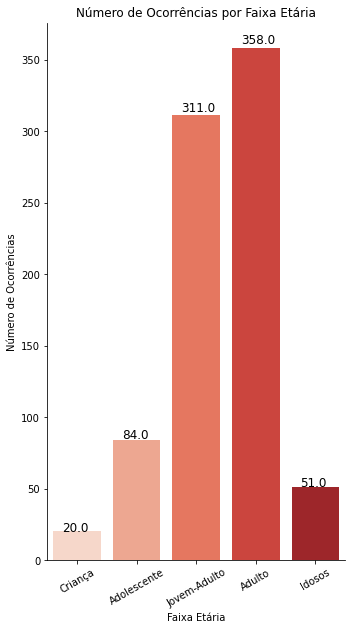

In [ ]:
plt.figure(figsize = (12,8))
g = sns.catplot(
    data=distribuicao, kind="bar",
    x= 'Publico', y="index", order = ['Criança','Adolescente','Jovem-Adulto','Adulto','Idosos'],
    palette='Reds', aspect = 0.6,height=8,ci = False,
)
g.set_xticklabels(rotation=30)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() *  1.01, 
            '{0:.1f}'.format(p.get_height()/1),   #Used to format it K representation
              color='black', 
              rotation='horizontal'
              , 
              size='large')
ax.set_title("Número de Ocorrências por Faixa Etária")
ax.set_ylabel("Número de Ocorrências")
ax.set_xlabel('Faixa Etária')
g.savefig("output-faixa.png")

Logo, podemos visualizar de acordo com os dados que temos, que a maioria das vítimas são pertencentes da faixa etária Adulto, que compreende vítimas de idade dos 24 anos à 64 anos.

## Qual tipo de arma mais foi utilizado?
Identificar qual arma foi mais utilizado nos crimes.

Para melhor visualização, vamos adotar apenas dados que possuimos dados reais do fato ocorrido.
 

In [ ]:
mortes_feminicidio = dados_nominais[(dados_nominais['Arma-Utilizada'] != 'Não Informado') & (dados_nominais['Natureza'] == 'feminicídio')]['Arma-Utilizada'].tolist()

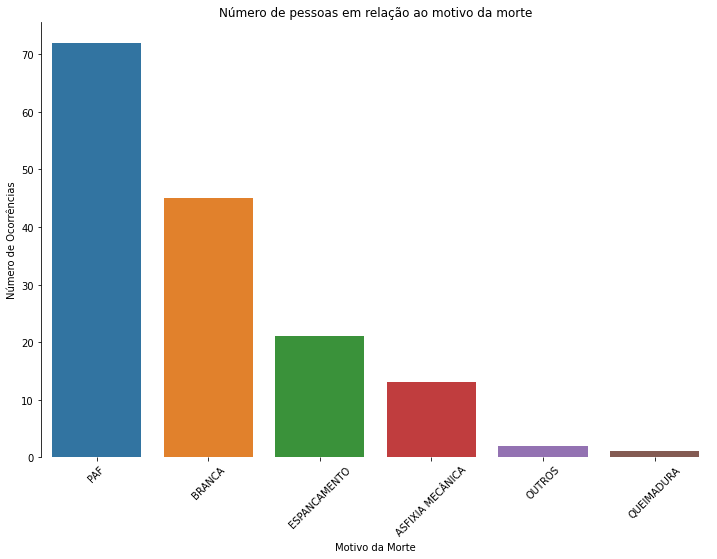

In [ ]:
armas_validas = []
for arma in dados_nominais['Arma-Utilizada']:
  if arma != 'Não Informado':
    armas_validas.append(arma)
plt.figure(figsize = (12,8))
g = sns.countplot(x = armas_validas)
g.set_xticklabels(g.get_xticklabels(), rotation=45,)
g.set(xlabel = 'Motivo da Morte', ylabel = 'Número de Ocorrências', title = 'Número de pessoas em relação ao motivo da morte')
g.grid(False)
sns.despine(top = True, bottom = True)
plt.show()

In [ ]:
armas = pd.Series(armas_validas)
distribuicao_armas = armas.reset_index().rename({ 0: 'Armas Utilizadas','index':'Ocorrencias'},axis = 1).groupby('Armas Utilizadas').count().reset_index()
distribuicao_armas = distribuicao_armas.sort_values('Ocorrencias',ascending = False)

In [ ]:
distribuicao_armas

,Armas Utilizadas,Ocorrencias
4,PAF,72
1,BRANCA,45
2,ESPANCAMENTO,21
0,ASFIXIA MECÂNICA,13
3,OUTROS,2
5,QUEIMADURA,1


In [ ]:
range_ = ['red', 'green', 'blue']

c = alt.Chart(distribuicao_armas).mark_bar().encode(x = alt.X('Armas Utilizadas', sort=alt.EncodingSortField(field="Ocorrencias", op="count", order='descending'),
                                                    axis=alt.Axis(title='Armas Utilizadas')), y = alt.Y('sum(Ocorrencias)', axis = alt.Axis(title = 'Número de Ocorrências')),
                                                 color =alt.Color('Ocorrencias', scale=alt.Scale(scheme = 'reds'))).\
                                                    properties( width=400,height=600, title = 'Armas mais utilizadas')
text = alt.Chart(distribuicao_armas).mark_text(dx=0, dy=-5, color='black').encode(
    x=alt.X('Armas Utilizadas', sort=alt.EncodingSortField(field="Ocorrencias", op="count", order='descending')),
    y=alt.Y('sum(Ocorrencias)'),
    detail='Ocorrencias:N',
    text=alt.Text('sum(Ocorrencias):Q', format='.1f')
)


(c + text).configure_axisX(labelAngle=315)

alt.LayerChart(...)

In [ ]:
distribuicao_armas

,Armas Utilizadas,Ocorrencias
4,PAF,72
1,BRANCA,45
2,ESPANCAMENTO,21
0,ASFIXIA MECÂNICA,13
3,OUTROS,2
5,QUEIMADURA,1


In [ ]:
armas_validas

['PAF',
 'PAF',
 'BRANCA',
 'ESPANCAMENTO',
 'PAF',
 'ASFIXIA MECÂNICA',
 'PAF',
 'PAF',
 'BRANCA',
 'PAF',
 'ESPANCAMENTO',
 'PAF',
 'ASFIXIA MECÂNICA',
 'PAF',
 'PAF',
 'PAF',
 'PAF',
 'BRANCA',
 'PAF',
 'ESPANCAMENTO',
 'ESPANCAMENTO',
 'ESPANCAMENTO',
 'ESPANCAMENTO',
 'PAF',
 'PAF',
 'BRANCA',
 'ESPANCAMENTO',
 'PAF',
 'ASFIXIA MECÂNICA',
 'ASFIXIA MECÂNICA',
 'PAF',
 'ESPANCAMENTO',
 'PAF',
 'BRANCA',
 'BRANCA',
 'PAF',
 'BRANCA',
 'BRANCA',
 'PAF',
 'PAF',
 'PAF',
 'BRANCA',
 'PAF',
 'BRANCA',
 'PAF',
 'PAF',
 'BRANCA',
 'ESPANCAMENTO',
 'ESPANCAMENTO',
 'BRANCA',
 'ESPANCAMENTO',
 'BRANCA',
 'PAF',
 'ASFIXIA MECÂNICA',
 'PAF',
 'ASFIXIA MECÂNICA',
 'ASFIXIA MECÂNICA',
 'PAF',
 'PAF',
 'BRANCA',
 'BRANCA',
 'ESPANCAMENTO',
 'ASFIXIA MECÂNICA',
 'BRANCA',
 'PAF',
 'PAF',
 'BRANCA',
 'PAF',
 'PAF',
 'PAF',
 'PAF',
 'ESPANCAMENTO',
 'PAF',
 'PAF',
 'BRANCA',
 'BRANCA',
 'PAF',
 'PAF',
 'ESPANCAMENTO',
 'BRANCA',
 'BRANCA',
 'PAF',
 'PAF',
 'BRANCA',
 'BRANCA',
 'PAF',
 'PAF',
 'BRA

In [ ]:
g = sns.catplot(
    data=armas_validas, kind="bar",
    x="Armas Utilizadas", y="Ocorrencias",
    palette='Reds', aspect = 0.6,height=8,ci = False,
)
g.set_xticklabels(rotation=30)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() *  1.01, 
            '{0:.1f}'.format(p.get_height()/1),   #Used to format it K representation
              color='black', 
              rotation='horizontal'
              , 
              size='large')
ax.set_title("Ocorrência de Armas Utilizada

SyntaxError: ignored

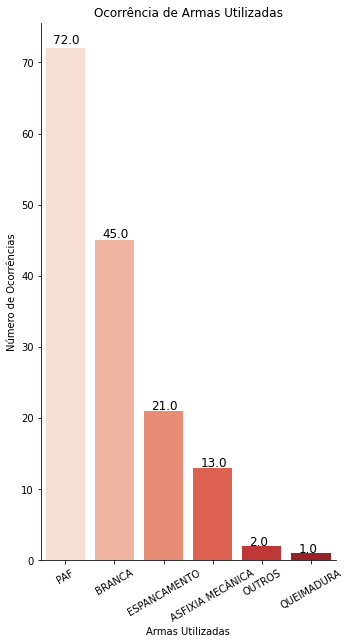

In [ ]:
g = sns.catplot(
    data=distribuicao_armas, kind="bar",
    x="Armas Utilizadas", y="Ocorrencias",
    palette='Reds', aspect = 0.6,height=8,ci = False,
)
g.set_xticklabels(rotation=30)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, 
            p.get_height() *  1.01, 
            '{0:.1f}'.format(p.get_height()/1),   #Used to format it K representation
              color='black', 
              rotation='horizontal'
              , 
              size='large')
ax.set_title("Ocorrência de Armas Utilizadas")
ax.set_ylabel("Número de Ocorrências")
g.savefig("output-armas.png")

In [ ]:
armas_utilizadas = dados_nominais.groupby(['Ano','Arma-Utilizada']).sum().reset_index()

In [ ]:
dados_nominais[(dados_nominais['Arma-Utilizada'] != 'Não Informado')]['Arma-Utilizada']

79605             PAF
79607             PAF
79625          BRANCA
79640    ESPANCAMENTO
79641             PAF
             ...     
81874          BRANCA
81910             PAF
81940             PAF
81958          BRANCA
81969             PAF
Name: Arma-Utilizada, Length: 154, dtype: object

In [ ]:
armas_utilizadas

,Ano,Arma-Utilizada,Mês
0,2019.0,ASFIXIA MECÂNICA,17.0
1,2019.0,BRANCA,78.0
2,2019.0,ESPANCAMENTO,13.0
3,2019.0,Não Informado,231395.0
4,2019.0,PAF,38.0
5,2019.0,QUEIMADURA,9.0
6,2020.0,ASFIXIA MECÂNICA,8.0
7,2020.0,BRANCA,44.0
8,2020.0,ESPANCAMENTO,27.0
9,2020.0,Não Informado,229250.0


In [ ]:
i = 0
for row in dados_nominais.itertuples():
    print(i)
    if dados_nominais.at[row.Index, 'Arma-Utilizada'] != "Não Informado":
        dados_nominais.at[row.Index, 'Arma-Tratada'] = dados_nominais.at[row.Index,  'Arma-Utilizada']
    i+=1

A saída de streaming foi truncada nas últimas 5000 linhas.
65077
65078
65079
65080
65081
65082
65083
65084
65085
65086
65087
65088
65089
65090
65091
65092
65093
65094
65095
65096
65097
65098
65099
65100
65101
65102
65103
65104
65105
65106
65107
65108
65109
65110
65111
65112
65113
65114
65115
65116
65117
65118
65119
65120
65121
65122
65123
65124
65125
65126
65127
65128
65129
65130
65131
65132
65133
65134
65135
65136
65137
65138
65139
65140
65141
65142
65143
65144
65145
65146
65147
65148
65149
65150
65151
65152
65153
65154
65155
65156
65157
65158
65159
65160
65161
65162
65163
65164
65165
65166
65167
65168
65169
65170
65171
65172
65173
65174
65175
65176
65177
65178
65179
65180
65181
65182
65183
65184
65185
65186
65187
65188
65189
65190
65191
65192
65193
65194
65195
65196
65197
65198
65199
65200
65201
65202
65203
65204
65205
65206
65207
65208
65209
65210
65211
65212
65213
65214
65215
65216
65217
65218
65219
65220
65221
65222
65223
65224
65225
65226
65227
65228
65229
65230
65231
65232
65233

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
dados_nominais['Arma-Utilizada'].unique()

array(['Não Informado', 'PAF', 'BRANCA', 'ESPANCAMENTO',
       'ASFIXIA MECÂNICA', 'OUTROS', 'QUEIMADURA'], dtype=object)

In [ ]:
for index, arma in enumerate(dados_nominais['Arma-Utilizada']):
  print(arma)
  if arma != 'Não Informado':
    dados_nominais.loc[index,'Arma_Tratada'] = arma

A saída de streaming foi truncada nas últimas 5000 linhas.
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não Informado
Não

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

PAF
ASFIXIA MECÂNICA
PAF
PAF
Não Informado
BRANCA
Não Informado
PAF
ESPANCAMENTO
PAF
Não Informado
ASFIXIA MECÂNICA
PAF
PAF
PAF
PAF
BRANCA
PAF
ESPANCAMENTO
ESPANCAMENTO
ESPANCAMENTO
ESPANCAMENTO
PAF
PAF
Não Informado
BRANCA
ESPANCAMENTO
PAF
ASFIXIA MECÂNICA
ASFIXIA MECÂNICA
PAF
ESPANCAMENTO
PAF
BRANCA
BRANCA
PAF
BRANCA
BRANCA
PAF
Não Informado
PAF
PAF
BRANCA
PAF
BRANCA
PAF
PAF
BRANCA
ESPANCAMENTO
ESPANCAMENTO
BRANCA
ESPANCAMENTO
BRANCA
PAF
ASFIXIA MECÂNICA
PAF
ASFIXIA MECÂNICA
ASFIXIA MECÂNICA
PAF
PAF
BRANCA
BRANCA
ESPANCAMENTO
ASFIXIA MECÂNICA
BRANCA
PAF
PAF
BRANCA
PAF
PAF
PAF
PAF
ESPANCAMENTO
PAF
PAF
BRANCA
BRANCA
PAF
PAF
Não Informado
ESPANCAMENTO
BRANCA
BRANCA
Não Informado
PAF
PAF
BRANCA
BRANCA
PAF
PAF
BRANCA
PAF
PAF
Não Informado
OUTROS
PAF
PAF
PAF
PAF
ESPANCAMENTO
PAF
BRANCA
BRANCA
ASFIXIA MECÂNICA
PAF
BRANCA
PAF
BRANCA
PAF
PAF
PAF
ESPANCAMENTO
BRANCA
BRANCA
PAF
PAF
BRANCA
BRANCA
PAF
ASFIXIA MECÂNICA
ESPANCAMENTO
BRANCA
ASFIXIA MECÂNICA
PAF
Não Informado
PAF
PAF
PAF
PAF
BRANCA
B

In [ ]:
dados_nominais['Arma-Tratada'] =dados_nominais['Arma-Utilizada'].apply(lambda x: x if x != 'Não Informado' else np.nan)

In [ ]:
dados_nominais['Arma-Tratada'].value_counts()

PAF                 72
BRANCA              45
ESPANCAMENTO        21
ASFIXIA MECÂNICA    13
OUTROS               2
QUEIMADURA           1
Name: Arma-Tratada, dtype: int64

In [ ]:
t =dados_nominais.groupby(['Ano','Arma-Tratada']).sum().reset_index()

In [ ]:
t['Arma-Tratada']

0    ASFIXIA MECÂNICA
1              BRANCA
2        ESPANCAMENTO
3                 PAF
4          QUEIMADURA
5    ASFIXIA MECÂNICA
6              BRANCA
7        ESPANCAMENTO
8                 PAF
Name: Arma-Tratada, dtype: object

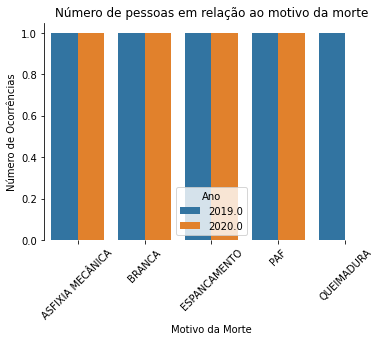

In [ ]:
g = sns.countplot(x = 'Arma-Tratada', hue = 'Ano',data = t)
g.set_xticklabels(g.get_xticklabels(), rotation=45,)
g.set(xlabel = 'Motivo da Morte', ylabel = 'Número de Ocorrências', title = 'Número de pessoas em relação ao motivo da morte')
g.grid(False)
sns.despine(top = True, bottom = True)
plt.show()

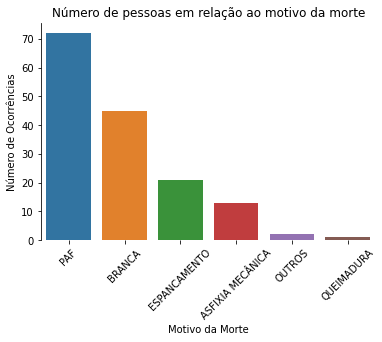

In [ ]:
violência_contra = dados_nominais[(dados_nominais['Arma-Utilizada'] != 'Não Informado')]['Arma-Utilizada'].tolist()
g = sns.countplot(x = armas_validas)
g.set_xticklabels(g.get_xticklabels(), rotation=45,)
g.set(xlabel = 'Motivo da Morte', ylabel = 'Número de Ocorrências', title = 'Número de pessoas em relação ao motivo da morte')
g.grid(False)
sns.despine(top = True, bottom = True)
plt.show()

Podemos entender, que a maioria dos crimes contra a mulher, um dos fatos que decorreram a morte delas foram por Perfurações de Arma de Fogo (PAF) e em seguida utilização de armas brancas.
Embora acima, liste diversos crimes, íncluindo homicídio, vamos análisar apenas crimes relacionados ao feminicío e verificar quais foram os motivos em relação a tal crime.

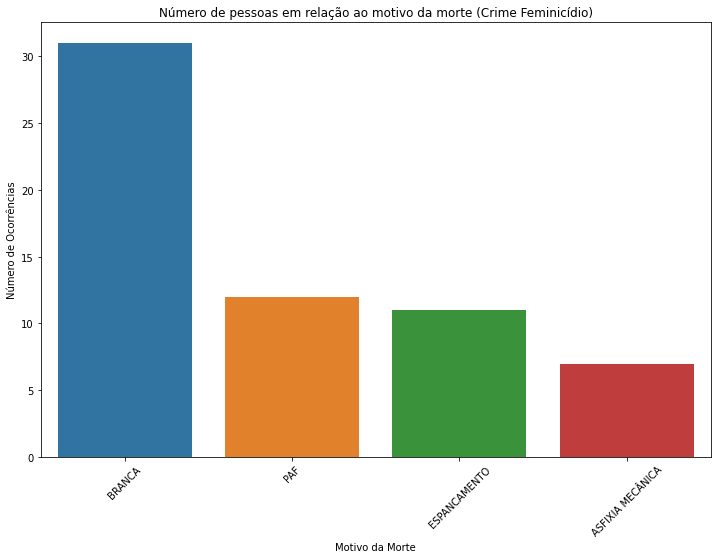

In [ ]:
armas_validas = []
for arma in mortes_feminicidio:
  if arma != 'Não Informado':
    armas_validas.append(arma)
plt.figure(figsize = (12,8))
g = sns.countplot(x = armas_validas, order = ['BRANCA','PAF','ESPANCAMENTO','ASFIXIA MECÂNICA'])
g.set_xticklabels(g.get_xticklabels(), rotation=45,)
g.set(xlabel = 'Motivo da Morte', ylabel = 'Número de Ocorrências', title = 'Número de pessoas em relação ao motivo da morte (Crime Feminicídio)')
plt.show()

Podemos entender que a arma mais utilizada foram armas brancas, podemos levar um alerta na qual, podem ser crimes ocorridos em casas.
Algumas reportagens corroboram com tal informação, tais listadas abaixo:
 * [Faca é a principal arma usada para matar mulheres em SP, mostra estudo sobre feminicídio](https://noticias.uol.com.br/cotidiano/ultimas-noticias/2018/03/01/faca-e-a-principal-arma-usada-para-matar-mulheres-em-casos-de-feminicidio-em-sp-mostra-estudo.htm)
 * [Maioria dos feminicídios em SP ocorre em casa e com arma branca](https://noticias.r7.com/sao-paulo/maioria-dos-feminicidios-em-sp-ocorre-em-casa-e-com-arma-branca-10012019)

 Em seguida, temos Perfurações por Arma de Fogo (PAF) como maior índice de motivo de morte das mulheres.

## Houve uma queda de violência após as medidas de implementação?

In [ ]:
dados_nominais['Data'] = dados_nominais['Data'].fillna(method = 'ffill')

In [ ]:
dados_nominais_2020 = dados_nominais[dados_nominais['Ano'] == 2020]

In [ ]:
_dados_nominais_2020_agrupados = dados_nominais_2020.groupby("Data").count()

In [ ]:
import calendar
datas_dias = []
dia_semana = ''
for data in dados_nominais_2020['Data']:
  data_dia = data.weekday()
  data_dia = calendar.day_name[data_dia]
  if data_dia == 'Sunday':
    dia_semana = 'Domingo'
  elif data_dia == 'Monday':
    dia_semana = 'Segunda-Feira'
  elif data_dia == 'Tuesday':
    dia_semana = 'Terça-Feira'
  elif data_dia == 'Wednesday':
    dia_semana = 'Quarta-Feira'
  elif data_dia == 'Thursday':
    dia_semana = 'Quinta-Feira'
  elif data_dia == 'Friday':
    dia_semana = 'Sexta-Feira'
  else:
    dia_semana = 'Sábado'
  datas_dias.append(dia_semana)


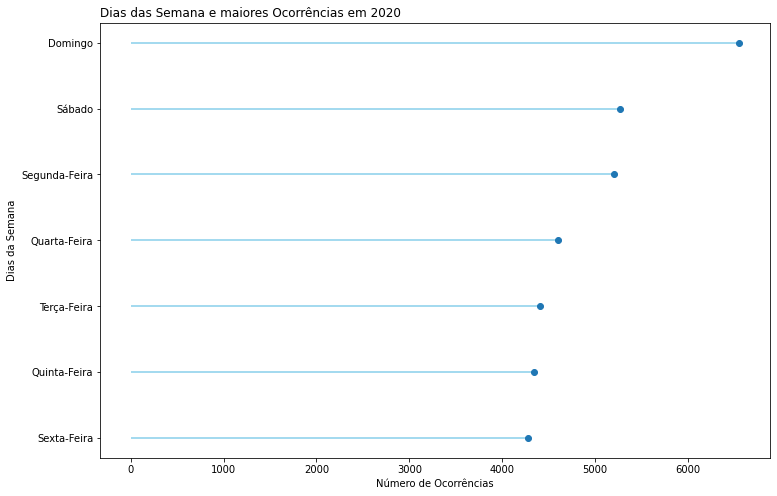

In [ ]:
ocorrencia_dias = {}
for d in datas_dias:
    if (d in ocorrencia_dias):
        ocorrencia_dias[d] += 1
    else:
        ocorrencia_dias[d] = 1
        
ocorrencias_por_dia = pd.Series(ocorrencia_dias).reset_index().rename({"index":"Dia da Semana", 0: "Número de Ocorrências"},axis = 1)
plt.figure(figsize =(12,8))
ordered_df = ocorrencias_por_dia.sort_values(by='Número de Ocorrências')
my_range=range(1,len(ocorrencias_por_dia.index)+1)
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['Número de Ocorrências'], color='skyblue')
plt.plot(ordered_df['Número de Ocorrências'], my_range, "o")
 
plt.yticks(my_range, ordered_df['Dia da Semana'])
plt.title("Dias das Semana e maiores Ocorrências em 2020", loc='left')
plt.xlabel('Número de Ocorrências')
plt.ylabel('Dias da Semana')
plt.show()

Podemos visualizar, que o maior número índices de violência ocorreram nos Domingos e Sábados.
Podemos observar uma queda de índices ao decorrer da semana, como do período de Terça à Sexta.

Vamos observar agora o índice de violência com os dias da Semana.

In [ ]:
def agrupamento_crimes(crime):
  resultado = ''
  if crime in ['ameaça por violência doméstica/familiar',
       'lesão corporal por violência doméstica/familiar',
       'outros crimes por violência doméstica/familiar',
       'injúria por violência doméstica/familiar',
       'dano por violência doméstica/familiar',
       'vias de fatos por violência doméstica/familiar ',
       'estupro por violência doméstica/familiar',
       'perturbação do sossego por violência doméstica/familiar',
       'difamação por violência doméstica/familiar',
       'estupro de vulnerável por violência doméstica/familiar',
       'constrangimento ilegal por violência doméstica/familiar',
       'calúnia por violência doméstica/familiar',
       'maus tratos por violência doméstica/familiar',
       'cárcere privado por violência doméstica/familiar']:

       resultado = 'Violência Doméstica'
  elif crime in ['feminicídio']:
    resultado = 'Feminicídio'
  elif crime in ['homicídio doloso', 'latrocínio', 'lesão corporal (seguida de morte)', 'homicídio']:
    resultado = 'Crime com resultado em morte'
  return resultado


dados_nominais_2020['Natureza em Categorias'] = dados_nominais_2020['Natureza'].apply(agrupamento_crimes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
dados_nominais_2020

,Natureza,Data,Mês,Ano,Município,Sexo,Idade,Arma-Utilizada,Estado,Arma-Tratada,Arma_Tratada,Natureza em Categorias
369,feminicídio,2020-01-01,1.0,2020.0,CAETE,não informado,Não Informado,Não Informado,MG,NaN,NaN,Feminicídio
370,feminicídio,2020-01-01,1.0,2020.0,FRONTEIRA,não informado,Não Informado,Não Informado,MG,NaN,NaN,Feminicídio
371,feminicídio,2020-01-01,1.0,2020.0,CABECEIRA GRANDE,não informado,Não Informado,Não Informado,MG,NaN,NaN,Feminicídio
372,feminicídio,2020-01-02,1.0,2020.0,MONTES CLAROS,não informado,Não Informado,Não Informado,MG,NaN,NaN,Feminicídio
373,feminicídio,2020-01-02,1.0,2020.0,SANTA RITA DO SAPUCAI,não informado,Não Informado,Não Informado,MG,NaN,NaN,Feminicídio
...,...,...,...,...,...,...,...,...,...,...,...,...
82992,homicídio doloso,2020-12-13,12.0,2020.0,LINHARES,feminino,23.0,Não Informado,ES,NaN,NaN,Crime com resultado em morte
82996,homicídio doloso,2020-12-15,12.0,2020.0,GUACUI,feminino,31.0,Não Informado,ES,NaN,NaN,Crime com resultado em morte
83000,homicídio doloso,2020-12-18,12.0,2020.0,SAO MATEUS,feminino,19.0,Não Informado,ES,NaN,NaN,Crime com resultado em morte
83008,homicídio doloso,2020-12-28,12.0,2020.0,SERRA,feminino,Não Informado,Não Informado,ES,NaN,NaN,Crime com resultado em morte


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[None,
 Text(0, 0.5, 'Número de Ocorrências'),
 Text(0.5, 1.0, 'Ocorrências por Crime de acordo com o Dia da Semana')]

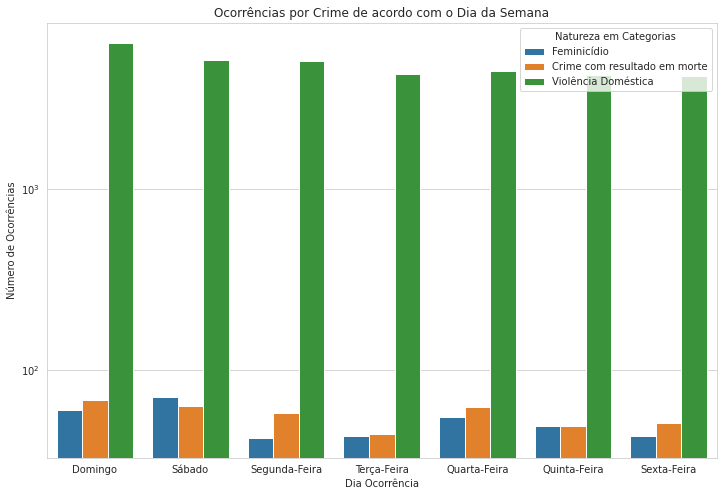

In [ ]:
sns.set_style("whitegrid")
dados_nominais_2020['Dia Ocorrência'] = datas_dias
plt.figure(figsize = (12,8))
g = sns.countplot(
    data=dados_nominais_2020, 
    x="Dia Ocorrência",hue="Natureza em Categorias",order = ['Domingo','Sábado','Segunda-Feira','Terça-Feira','Quarta-Feira','Quinta-Feira','Sexta-Feira']
)

g.set(yscale="log",ylabel = 'Número de Ocorrências',title = 'Ocorrências por Crime de acordo com o Dia da Semana')

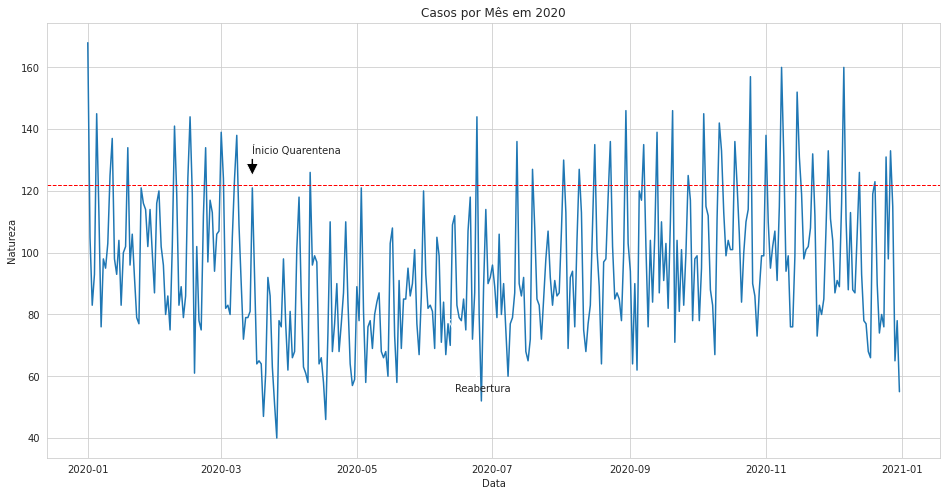

In [ ]:
plt.figure(figsize = (16,8))
sns.lineplot(x = _dados_nominais_2020_agrupados.index, y =  'Natureza', data = _dados_nominais_2020_agrupados)
plt.annotate('Ínicio Quarentena', xy=(pd.to_datetime("2020-03-15"),125), xytext=(pd.to_datetime("2020-03-15"),132),
        arrowprops=dict(facecolor='black', shrink=1,  width=2.5))
plt.annotate('Reabertura', xy=(pd.to_datetime("2020-06-10"),80), xytext=(pd.to_datetime("2020-06-14"),55),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))
plt.axhline(122,linewidth=1, color='r', linestyle = '--')
plt.title("Casos por Mês em 2020")
plt.show()

Nessa nova visualização, de dados nominais, podemos entender melhor a visualização da queda da criminalidade, logo após a implementação da quarentena, temos uma queda absurda de índices de criminalidade, principalmente após os dias iniciais da implementaçao da quarentena, apenas tendo um dia de pico, que torna maior que o número de casos quando foi implementado a quarentena, no dia 15-03-2020.

Logo após os processos de reabertura ou fases de flexibilização voltamos a ter um aumento de casos.


##Correlação Idade e Armas Utilizadas

In [ ]:
dados_nominais['Idade_Agrupado'] = idades

ValueError: ignored

In [ ]:
_dados_dv_idade = dados_nominais[(dados_nominais['Idade'] != 'Não Informado') & (dados_nominais['Arma-Utilizada'] != 'Não Informado')]

In [ ]:
_dados_dv_idade = dados_nominais[(dados_nominais['Idade'] != 'Não Informado') & (dados_nominais['Sexo'] != 'masculino') & (dados_nominais['Arma-Utilizada']!= 'Não Informado')]#[(dados_nominais['Idade'] != 'Não Infromado') & (dados_nominais['Arma-Utilizada'] != 'Não Informado') & ((dados_nominais['Sexo'] != 'Masculino')]

In [ ]:
idades = []
grupo_idade = ''
for idade in _dados_dv_idade['Idade']:
  if idade == 'Não Informado' or idade == '-':
    pass 
  else:
    nova_idade = float(idade)
    if nova_idade >= 0.0 and nova_idade < 12:
      grupo_idade = 'Criança'
    elif nova_idade >= 12.0 and nova_idade < 18.0:
      grupo_idade = 'Adolescente'
    elif nova_idade >= 18.0  and nova_idade < 30:
      grupo_idade = 'Jovem-Adulto'
    elif nova_idade >= 30 and nova_idade < 60.0:
      grupo_idade = 'Adulto'
    else:
      grupo_idade = 'Idosos'
    idades.append(grupo_idade)

In [ ]:
_dados_dv_idade['Idades-Agrupado'] = idades

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
_dados_dv_idade

,Natureza,Data,Mês,Ano,Município,Sexo,Idade,Arma-Utilizada,Estado,Idades-Agrupado
79605,homicídio,NaT,NaN,NaN,Branquinha,feminino,36,PAF,AL,Adulto
79607,homicídio,NaT,NaN,NaN,Pilar,feminino,50,PAF,AL,Adulto
79625,feminicídio,NaT,NaN,NaN,União dos Palmares,feminino,41,BRANCA,AL,Adulto
79641,homicídio,NaT,NaN,NaN,Maceió,feminino,24,PAF,AL,Jovem-Adulto
79644,latrocínio,NaT,NaN,NaN,Rio Largo,feminino,53,ASFIXIA MECÂNICA,AL,Adulto
...,...,...,...,...,...,...,...,...,...,...
81874,feminicídio,NaT,NaN,NaN,Poço das Trincheiras,feminino,39.0,BRANCA,AL,Adulto
81910,homicídio,NaT,NaN,NaN,Atalaia,feminino,39.0,PAF,AL,Adulto
81940,homicídio,NaT,NaN,NaN,Maceió,feminino,53.0,PAF,AL,Adulto
81958,feminicídio,NaT,NaN,NaN,Maceió,feminino,43.0,BRANCA,AL,Adulto


In [ ]:
_dados_dv = _dados_dv_idade.groupby(['Idades-Agrupado','Arma-Utilizada']).count()

In [ ]:
_dados_dv = _dados_dv.reset_index()
_dados_dv

,index,Idades-Agrupado,Arma-Utilizada,Natureza,Data,Mês,Ano,Município,Sexo,Idade,Estado
0,0,Adolescente,ASFIXIA MECÂNICA,1,1,1,1,1,1,1,1
1,1,Adolescente,BRANCA,1,0,0,0,1,1,1,1
2,2,Adolescente,ESPANCAMENTO,2,0,0,0,2,2,2,2
3,3,Adolescente,PAF,8,0,0,0,8,8,8,8
4,4,Adulto,ASFIXIA MECÂNICA,5,2,2,2,5,5,5,5
5,5,Adulto,BRANCA,28,11,11,11,28,28,28,28
6,6,Adulto,ESPANCAMENTO,6,3,3,3,6,6,6,6
7,7,Adulto,OUTROS,1,0,0,0,1,1,1,1
8,8,Adulto,PAF,27,7,7,7,27,27,27,27
9,9,Criança,ASFIXIA MECÂNICA,3,0,0,0,3,3,3,3


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


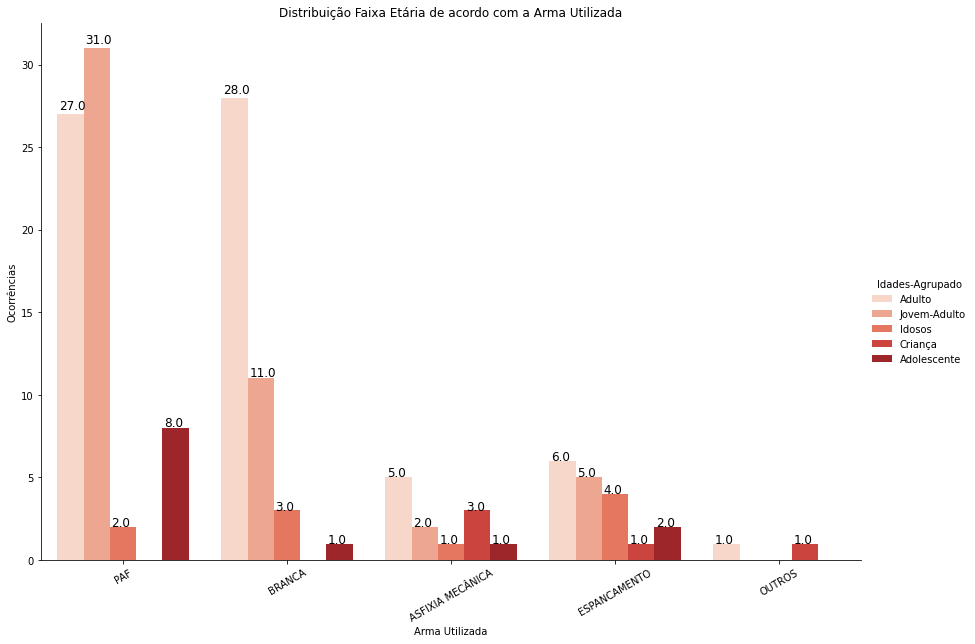

In [ ]:
g = sns.catplot(
    data=_dados_dv_idade, kind = 'count',
    x="Arma-Utilizada", hue = 'Idades-Agrupado',
    palette='Reds', aspect = 1.5,height=8,ci = False,
)
g.set_xticklabels(rotation=30)
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01, 
            p.get_height() * 1.01, 
           '{0:.1f}'.format(p.get_height()/1),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
ax.set_title("Distribuição Faixa Etária de acordo com a Arma Utilizada")
ax.set_xlabel("Arma Utilizada")
ax.set_ylabel('Ocorrências')
g.savefig("output-faixa_etaria-armas.png")

<Figure size 864x576 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


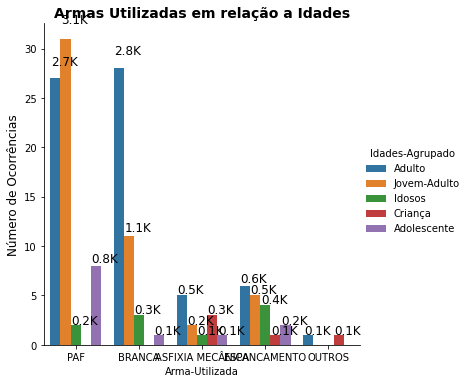

In [ ]:
plt.figure(figsize = (12,8))
g = sns.catplot(x = 'Arma-Utilizada', hue = '' data = _dados_dv_idade,hue = 'Idades-Agrupado', kind = 'count')
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.01, 
            p.get_height() * 1.05, 
           '{0:.1f}K'.format(p.get_height()/10),   #Used to format it K representation
            color='black', 
            rotation='horizontal', 
            size='large')
plt.title("Armas Utilizadas em relação a Idades", fontsize = 14, fontweight = 'bold')
plt.ylabel("Número de Ocorrências", fontsize = 12)
plt.show()

#Google Trends

In [ ]:
pip install pytrends

In [ ]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='pt-BR', )
kw_list = ['Violência Doméstica','violencia domestica']
violencia_domestica = pytrends.get_historical_interest(kw_list, year_start=2019, month_start=1, day_start=1, hour_start=0, year_end=2020, month_end=12, day_end=31, hour_end=0, sleep=1)


In [ ]:
df3 = pd.read_csv('/content/google_trends1.csv')
trends_covid = pd.read_csv("/content/Trends_Covid_2020.csv")
df3['date'] = pd.to_datetime(df3['date'])
trends_covid['date'] = pd.to_datetime(trends_covid['date'])

##Analisando o Comparativo de 2019 e 2020
Abaixo, vamos realizar uma análise comparativa de palavras chaves, genéricas, em 2019 e 2020.

Iremos realizar o comparativo em relação aos meses que foram coletados e fornecidos pela API.

Algumas palavras-chaves, utilizadas para a busca foram:
* Violência Doméstica
* Violencia Domestica
* violência domestica
* Femincídio
* Abuso Sexual

A ideia para utilização de diferentes palavras chaves é para o mesmo tema, é com a finalidade de abranger diferentes formas de busca, e assim busca um melhor resultado que reflete a realidade.

Vamos realizar visualizações em relação a tais temas abaixo:


In [ ]:
violencia_domestica = violencia_domestica.reset_index()
violencia_domestica['mes'] = violencia_domestica['date'].apply(lambda x: x.month)
violencia_domestica['ano'] = violencia_domestica['date'].apply(lambda x: x.year)
violencia_domestica['dia'] = violencia_domestica['date'].apply(lambda x: x.day)

In [ ]:
violencia_domestica['Casos Média']  = (violencia_domestica['Violência Doméstica'] + violencia_domestica['violencia domestica']) / 2

In [ ]:
violencias_trends = pd.read_csv("/content/trends_abuso.csv")
violencias_trends['date'] = pd.to_datetime(violencias_trends['date'])
violencias_trends = violencias_trends.reset_index()
violencias_trends['mes'] = violencias_trends['date'].apply(lambda x: x.month)
violencias_trends['ano'] = violencias_trends['date'].apply(lambda x: x.year)

In [ ]:
#violencias_trends['total violência'] = violencias_trends['violência doméstica'] + violencias_trends['violencia domestica'] + violencias_trends['violência domestica']
#violencias_trends['ano'] = violencias_trends['date'].apply(lambda x: x.year)
#violencias_trends['mês'] = violencias_trends['date'].apply(lambda x: x.month)

In [ ]:
violencia_domestica.to_csv("violencia_trends.csv")

##Violência Contra a  Mulher

A ideia principal é realizar um comparativo, entre os índices de busca por essa palavra chave entre 2019 e 2020 e observar se houve alguma mudança.

Essa tendência de busca, esta atrelado a diversos índices que houveram aumento de denuncias relacionadas a violência contra a mulher durante o período da quarentena.

[Violência contra a mulher aumenta em meio à pandemia; denúncias ao 180 sobem 40%](https://www.istoedinheiro.com.br/violencia-contra-a-mulher-aumenta-em-meio-a-pandemia-denuncias-ao-180-sobem-40/)

[Violência Domestica: Denúncias no Ligue 180 subiram 14% nos quatro primeiros meses de 2020](https://oglobo.globo.com/celina/violencia-domestica-denuncias-no-ligue-180-subiram-14-nos-quatro-primeiros-meses-de-2020-24426892)

In [ ]:
violencia_domestica['date'] = pd.to_datetime(violencia_domestica['date']).dt.date

In [ ]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [ ]:
alt.Chart(violencia_domestica).mark_line().encode(
    x='mes',
    y='sum(Casos Média):Q'
)

TypeError: ignored

alt.Chart(...)

In [ ]:
violencia_domestica['Violência Doméstica']

0         0
1         0
2         0
3         0
4         0
         ..
17113    17
17114    15
17115    20
17116    26
17117    58
Name: Violência Doméstica, Length: 17118, dtype: int64

In [ ]:
violencia_domestica_1 = violencia_domestica.groupby("violencia domestica").mean()

In [ ]:
violencia_domestica_1 = violencia_domestica_1.reset_index()

In [ ]:
violencia_domestica

,date,Violência Doméstica,violencia domestica,isPartial,mes,ano,dia,Casos Média
0,2019-01-01,0,0,False,1,2019,1,0.0
1,2019-01-01,0,0,False,1,2019,1,0.0
2,2019-01-01,0,0,False,1,2019,1,0.0
3,2019-01-01,0,0,False,1,2019,1,0.0
4,2019-01-01,0,0,False,1,2019,1,0.0
...,...,...,...,...,...,...,...,...
17113,2020-12-30,17,38,False,12,2020,30,27.5
17114,2020-12-30,15,56,False,12,2020,30,35.5
17115,2020-12-30,20,46,False,12,2020,30,33.0
17116,2020-12-30,26,43,False,12,2020,30,34.5


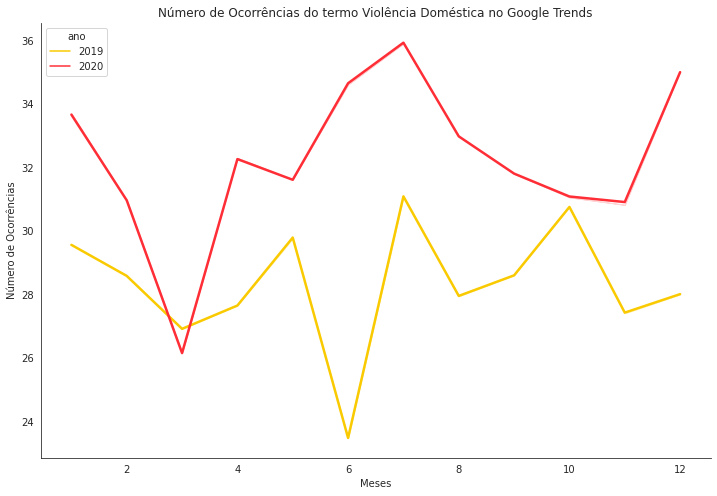

In [ ]:
plt.figure(figsize = (12,8))
palette =['#faca00','#FF2E36']
sns.set_style('white')
g = sns.lineplot(x = 'mes', y = 'Casos Média', data = violencia_domestica, hue = 'ano', ci = False, palette = palette , markers = True,dashes=True, lw=2.5,)
g.set(title = 'Número de Ocorrências do termo Violência Doméstica no Google Trends', ylabel = 'Número de Ocorrências', xlabel = 'Meses')
sns.despine()
# label points on the plot
g.figure.savefig("violencia_domestica.png")

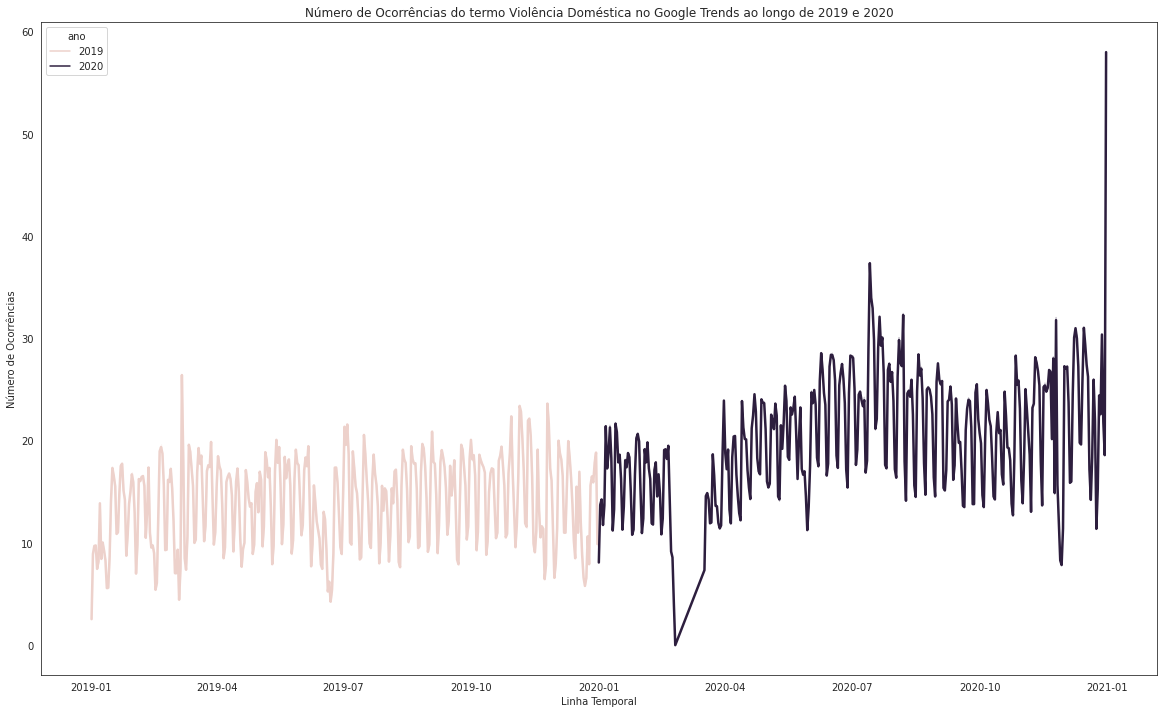

In [ ]:
plt.figure(figsize = (20,12))
sns.set_style("white")
g = sns.lineplot(x = 'date', y = 'Violência Doméstica', data = violencia_domestica, hue = 'ano', ci = False,  lw=2.5,)
g.set(title = 'Número de Ocorrências do termo Violência Doméstica no Google Trends ao longo de 2019 e 2020', ylabel = 'Número de Ocorrências', xlabel = 'Linha Temporal')
# label points on the plot
g.figure.savefig("violencia_domestica.png")

Podemos observar que, houve um aumento de pesquisa sobre o termo Violência Domestica durante a pandemia do CoronaVirus, podemos observar que a partir do 3 mês, Março, na qual se iniciou as medidas implementadas da quaretena, tivemos uma explosão de buscas relacionadas ao tema, na qual, se refletiu essa tendência de pesquisas durante todo o ano, ficando seu índice de busca superior ao de 2019.

In [ ]:
feminicidio = pd.read_csv("/content/feminicidio_trends.csv")
feminicidio['date'] = pd.to_datetime(feminicidio['date'])
feminicidio['mês'] = feminicidio['date'].apply(lambda x: x.month)
feminicidio['ano'] = feminicidio['date'].apply(lambda x: x.year)

FileNotFoundError: ignored

In [ ]:
feminicidio['Total Feminicídio'] = feminicidio['feminicidio'] +  feminicidio['femicídio'] + feminicidio['Feminicidio'] + feminicidio['Feminicídio']
feminicidio

In [ ]:

pytrends = TrendReq(hl='pt-BR', )
kw_list = ['feminicidio','femicídio']
femincidio = pytrends.get_historical_interest(kw_list, year_start=2019, month_start=1, day_start=1, hour_start=0, year_end=2020, month_end=12, day_end=31, hour_end=0, sleep=1)


HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)


In [ ]:
feminicidio = femincidio.reset_index()

In [ ]:
feminicidio = femincidio.reset_index()

In [ ]:
feminicidio['mês'] = feminicidio['date'].apply(lambda x: x.month)
feminicidio['ano'] = feminicidio['date'].apply(lambda x: x.year)

In [ ]:
feminicidio

,date,feminicidio,femicídio,isPartial,mês,ano
0,2019-01-01 00:00:00,0,0,False,1,2019
1,2019-01-01 01:00:00,0,0,False,1,2019
2,2019-01-01 02:00:00,0,0,False,1,2019
3,2019-01-01 03:00:00,0,0,False,1,2019
4,2019-01-01 04:00:00,0,0,False,1,2019
...,...,...,...,...,...,...
16944,2020-12-30 20:00:00,48,0,False,12,2020
16945,2020-12-30 21:00:00,52,1,False,12,2020
16946,2020-12-30 22:00:00,60,0,False,12,2020
16947,2020-12-30 23:00:00,81,0,False,12,2020


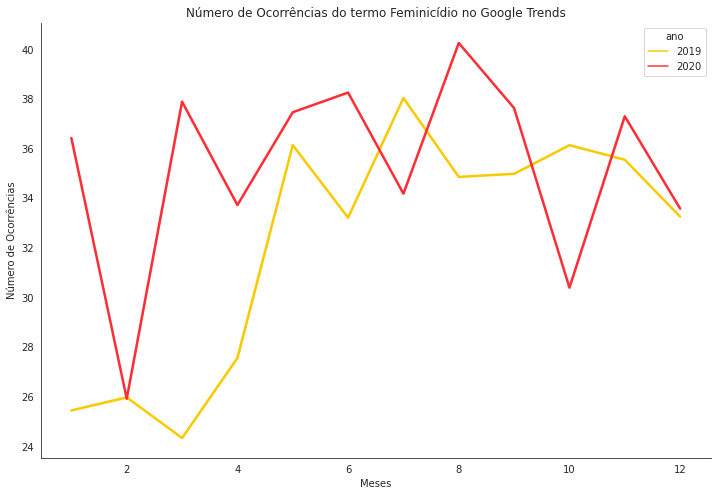

In [ ]:
plt.figure(figsize = (12,8))
palette =['#faca00','#FF2E36']

sns.set_style("white")
g = sns.lineplot(x = 'mês', y = 'feminicidio', data = feminicidio, hue = 'ano', ci = False, palette = palette , markers = True,dashes=True, lw=2.5,)
g.set(title = 'Número de Ocorrências do termo Feminicídio no Google Trends', ylabel = 'Número de Ocorrências', xlabel = 'Meses')
# label points on the plot
sns.despine()
plt.show()

## Google Trends - Comparativo Feminicídio

In [ ]:
plt.figure(figsize = (12,8))
sns.set_style("darkgrid")
g = sns.lineplot(x = 'mês', y = 'Total Feminicídio', data = feminicidio, hue = 'ano', ci = False, style = 'ano', palette=['#0bd6d4', 'red'],  markers = True,dashes=True, lw=2.5)
g.set(title = 'Número de Ocorrências do termo Feminicídio no Google Trends', xlabel = 'Número de Ocorrências', ylabel = 'Meses')
plt.show()

Podemos destacar, também o aumento do índice de buscas sobre o termo Feminicídio, no mesmo período, se mantendo com índices superiores ao do ano de 2019.
O que podemos levar a hipótese de que, tivemos um maior interesse sobre esse tema durante o período da pandemia.

In [ ]:
outros = outros.reset_index()
outros['mês'] = outros['date'].apply(lambda x: x.month)
outros['ano'] =  outros['date'].apply(lambda x: x.year)

In [ ]:
fig, ax = plt.subplots(figsize = (20,12), nrows= 2)
graph1 = sns.lineplot(x = 'mês', y = 'abuso sexual', data = outros, hue = 'ano', ax= ax[0], palette=['#0bd6d4', 'red'],ci = False)
graph2 = sns.lineplot(x = 'mês', y = 'estupro', data = outros, hue = 'ano', ax= ax[1], palette = ['#0bd6d4', 'red'], ci = False)
graph1.set(title = 'Número de Ocorrências Abuso Sexual por meio do Google Trends', ylabel = 'Número de Ocorrências')
graph2.set(title = 'Número de OcorrÊncias por Estupro por meio do Google Trends', ylabel = 'Número de Ocorrências')
plt.show()

Podemos ver que temos uma maior variação nos índices de pesquisa e variabilidade em relação aos anos,contudo temos picos de termos pesquisados entre os meses de Maio e Junho e em Novembro também temos um pico sobre termos buscados.

#Estudo

In [ ]:
from pytrends.request import TrendReq

kw_list = ['Mercado Livre']
pytrends = TrendReq(hl='pt-BR', tz = -120, retries=2, backoff_factor=0.1, requests_args={'verify':False} )

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
kw_list = ['Magazine Luiza']
pytrends.build_payload(kw_list, cat=390, timeframe='now 7-d', geo='BR-SP', gprop='')

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
pytrends.interest_over_time()

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


,Magazine Luiza,isPartial
date,,
2021-03-21 07:00:00,0,False
2021-03-21 08:00:00,0,False
2021-03-21 09:00:00,0,False
2021-03-21 10:00:00,35,False
2021-03-21 11:00:00,44,False
...,...,...
2021-03-28 02:00:00,59,False
2021-03-28 03:00:00,0,False
2021-03-28 04:00:00,0,False


In [ ]:
pytrends.build_payload(kw_list, cat=0, timeframe='now 1-d')

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [ ]:
kw_list = ['Magazine Luiza']
pytrends = TrendReq(hl='pt-BR', retries=2, backoff_factor=0.1, requests_args={'verify':False} )
magazine_luiza = pytrends.get_historical_interest(kw_list, year_start=2021, month_start=3, day_start=25, hour_start=20, year_end=2021, month_end=3, day_end=26, hour_end=19, geo='BR', sleep=5)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is be

The request failed: Google returned a response with code 400.


In [ ]:
pytrends.get_historical_interest(kw_list, year_start=2021, month_start=3, day_start=25, hour_start=20, year_end=2021, month_end=3, day_end=26, hour_end=19, geo='BR', sleep=5)

In [ ]:
magazine_luiza = magazine_luiza.reset_index()

In [ ]:
magazine_luiza

,Magazine Luiza,isPartial
date,,
2021-03-25 20:00:00,89,False
2021-03-25 21:00:00,81,False
2021-03-25 22:00:00,83,False
2021-03-25 23:00:00,90,False
2021-03-26 00:00:00,84,False
2021-03-26 01:00:00,67,False
2021-03-26 02:00:00,62,False
2021-03-26 03:00:00,57,False
2021-03-26 04:00:00,51,False


In [ ]:
magazine_luiza['dia'] = magazine_luiza['date'].apply(lambda x: x.day)
magazine_luiza['ano'] = magazine_luiza['date'].apply(lambda x: x.year)
magazine_luiza['mes'] = magazine_luiza['date'].apply(lambda x: x.month)
magazine_luiza = magazine_luiza.groupby(['dia','mes','ano']).mean()

In [ ]:
magazine_luiza.reset_index()

,dia,mes,ano,Magazine Luiza,isPartial
0,25,3,2021,72.52381,False


In [ ]:
pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=True)

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


KeyError: ignored

In [ ]:
import pandas as pd
pytrends.related_topics()['Magazine Luiza']['top']


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


,value,formattedValue,hasData,link,topic_mid,topic_title,topic_type
0,100,100,True,/trends/explore?q=/m/0g556qj&date=now+7-d&geo=...,/m/0g556qj,Magazine Luiza,Empresa
1,4,4,True,/trends/explore?q=/m/0261gkz&date=now+7-d&geo=...,/m/0261gkz,Casas Bahia,Empresa
2,1,1,True,/trends/explore?q=/g/1yjg82s2q&date=now+7-d&ge...,/g/1yjg82s2q,Lojas CEM,Empresa
3,0,<1,True,/trends/explore?q=/m/09s1wj&date=now+7-d&geo=B...,/m/09s1wj,Cupom,Assunto
4,0,<1,True,/trends/explore?q=/m/02jfdl&date=now+7-d&geo=B...,/m/02jfdl,Cupom de desconto,Assunto


In [ ]:
pytrends.related_queries()['Magazine Luiza']['top']

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


,query,value
0,iphone 8 plus magazine luiza,100
1,magazine luiza celular,96
2,magazine luiza celulares samsung,79


In [ ]:
pytrends.suggestions('Magazine Luiza')

[{'mid': '/m/0g556qj', 'title': 'Magazine Luiza', 'type': 'Empresa'},
 {'mid': '/g/11h15xz1mc', 'title': 'magazine', 'type': 'Assunto'},
 {'mid': '/g/1tnl1l_g', 'title': 'Magazine Luiza', 'type': 'Assunto'},
 {'mid': '/g/1tdyryp8', 'title': 'Magazine Luiza', 'type': 'Assunto'},
 {'mid': '/g/1td3h7y4', 'title': 'Magazine Luiza', 'type': 'Assunto'}]

In [ ]:
pytrends.interest_over_time()

,Magazine Luiza,isPartial
date,,
2021-03-25 20:00:00,93,False
2021-03-25 21:00:00,86,False
2021-03-25 22:00:00,88,False
2021-03-25 23:00:00,95,False
2021-03-26 00:00:00,89,False
2021-03-26 01:00:00,67,False
2021-03-26 02:00:00,62,False
2021-03-26 03:00:00,55,False
2021-03-26 04:00:00,50,False


In [ ]:
pytrends.categories()

{'children': [{'children': [{'children': [{'id': 607,
       'name': 'Animais domésticos exóticos'},
      {'id': 886, 'name': 'Cães'},
      {'id': 888, 'name': 'Cavalos'},
      {'id': 889, 'name': 'Coelhos e roedores'},
      {'id': 885, 'name': 'Gatos'},
      {'id': 884, 'name': 'Pássaros'},
      {'id': 887, 'name': 'Peixe e aquário'},
      {'id': 890, 'name': 'Répteis e anfíbios'}],
     'id': 563,
     'name': 'Animais de estimação'},
    {'children': [{'id': 883, 'name': 'Bem-estar animal'},
      {'id': 379, 'name': 'Comida e suprimentos para animais de estimação'},
      {'id': 380, 'name': 'Veterinários'}],
     'id': 882,
     'name': 'Produtos e serviços para animais'},
    {'children': [{'id': 1278, 'name': 'Insetos e entomologia'},
      {'id': 1009, 'name': 'Zoológicos, aquários, preservação'}],
     'id': 119,
     'name': 'Vida selvagem'}],
   'id': 66,
   'name': 'Animais de estimação e animais'},
  {'children': [{'children': [{'id': 894, 'name': 'Atuação e teatro'